<a id="top"></a>
<h1 style="font-size:50px; color:#3A71AE"><center>Chicago Crimes</center></h1>

<h1 style="font-size:35px; color:#3A71AE">Table of Content:</h1>

1. [**Introduction**](#id_1)
2. [**Objective**](#id_2)
3. [**Notebook Structure**](#id_3)
4. [**Data Acquisition**](#id_4)
5. [**Exploring and Analyzing**](#id_5)
6. [**Questions**](#id_6)

<a id="id_1"></a>
<h1 style="font-size:30px; color:#3A71AE">Introduction</h1>

Crime analysis has become one of the most important topics in the field of data science, since the availability of crime data sets, in addition to the need of analyzing the reasons of those crime activities and the prediction of future crimes, according to the past criminal records. A lot of online crime datasets are available nowadays, like the city of Atlanta Crime 2009-2017 dataset, city of Baltimore Crime 2011-2016 dataset and many other datasets<br>
that can be found [here](https://data.world/datasets/crime).

But in this project we are going to work on the [**Crimes in Chicago**](https://www.kaggle.com/currie32/crimes-in-chicago) Dataset.

[Back to Top](#top)

<a id="id_2"></a>
<h1 style="font-size:30px; color:#3A71AE">Objective</h1>

The objective of the activity is to answer some questions regarding criminology. Moreover, answering these questions and reaching a well-established analysis, will give us a chance to use these approaches with crimes in other cities also. The aim is to explore the dataset and find key points that can help in detecting the major areas of crime, factors behind these crimes and safe spots around the city. Moreover, we explore and answer more questions regarding performance indicators of the police in the city and the correlation between socioeconomic factors and crimes in the city. 

[Back to Top](#top)

<a id="id_3"></a>
<h1 style="font-size:30px; color:#3A71AE">Notebook Structure</h1>

**Note:** All the wrangling processess have been done in [**Chicago Crimes Wrangling**](Chicago_Crimes_Wrangling.ipynb) notebook.

**This Notebook will be structured as follows:**<br>
- We will start with analyzing and exploring the data.
- Then Visualizing the insights and answers we have found.
- Finally, we will report our efforts using Jupyter Notebook Slideshow.

[Back to Top](#top)

<a id="id_4"></a>
<h1 style="font-size:30px; color:#3A71AE">Data Acquisition</h1>

[Back to Top](#top)

In [2]:
# Imports and Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import geopandas as gpd
from matplotlib.colors import rgb2hex
from matplotlib.colors import LinearSegmentedColormap

# Set seaborn style as defualt
plt.style.use('seaborn')
sb.set(style='white')
figsize = [14.70, 8.27]

# Set plot configuration
plt.rcParams['figure.dpi']= 200

df_ls = ['crimes', 'dates', 'top_danger_locs']

for df in df_ls:
    globals()[df] = pd.read_csv(f"./Data/{df}.csv")

dates['date'] = pd.to_datetime(dates['date'])
dates = dates[dates['year'].isin(np.arange(2002, 2017))]

# Change categorical variables to categorical data type and add categorical order for dates
cate_vars = ['primary_type', 'location_description', 'year', 'month', 'day', 'weekday']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekdays = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

for var in cate_vars:
    if var in crimes.columns:
        crimes[var] = pd.Categorical(crimes[var])
    else:
        if var == 'month' :
            dates[var] = pd.Categorical(dates[var], ordered=True, categories=months)
        elif var == 'weekday' :
            dates[var] = pd.Categorical(dates[var], ordered=True, categories=weekdays)
        else:
            dates[var] = pd.Categorical(dates[var], ordered=True)

chicago_fp = "Data/Shapefile/Neighborhoods_2012b.shp"
chicago = gpd.read_file(chicago_fp)

gdf = gpd.GeoDataFrame(top_danger_locs,
                           geometry=gpd.points_from_xy(top_danger_locs['x_coordinate'], 
                                                       top_danger_locs['y_coordinate']))

display(crimes.head()), display(dates.head())

,id,primary_type,location_description,arrest,domestic
0,4676906,Other Offense,Residence,False,True
1,4677901,Theft,Residence,False,False
2,4791194,Crim Sexual Assault,Residence,True,True
3,4679521,Other Offense,Residence Porch/Hallway,False,False
4,4680124,Theft,Residence,False,False


,id,date,year,month,day,weekday
0,4676906,2003-03-01 00:00:00,2003,Mar,1,Sat
1,4677901,2003-05-01 01:00:00,2003,May,1,Thu
3,4679521,2003-03-15 00:00:00,2003,Mar,15,Sat
4,4680124,2003-01-01 00:00:00,2003,Jan,1,Wed
5,4682244,2003-06-05 00:00:00,2003,Jun,5,Thu


(None, None)

<a id="id_5"></a>
<h1 style="font-size:30px; color:#3A71AE">Exploring The Data</h1>
Let's explore the data and find some insights in order to have some questions to answer. 

**So, let's check the following aspects:**
1. [**Primary Crime Types**](#id_5_1)
2. [**Crime Locations**](#id_5_2)
3. [**Successful VS. Failed Arrests**](#id_5_3)
4. [**Domestic Violence Crimes**](#id_5_4)
5. [**Crimes by Years**](#id_5_5)
6. [**Crimes by Month**](#id_5_6)
7. [**Crimes by Day**](#id_5_7)
8. [**Crimes by Weekday**](#id_5_8)

[Back to Top](#top)

<a id="id_5_1"></a>

### [1. Primary Crime Types](#id_5_1)

[Back to Exploring](#id_5)

In [3]:
crimes.primary_type.value_counts()

Theft                                1143120
Battery                               998640
Criminal Damage                       633226
Narcotics                             597681
Other Offense                         337747
Assault                               334037
Burglary                              326230
Motor Vehicle Theft                   254374
Robbery                               207989
Deceptive Practice                    194083
Criminal Trespass                     159342
Prostitution                           56985
Weapons Violation                      54513
Public Peace Violation                 41036
Offense Involving Children             35483
Crim Sexual Assault                    20165
Sex Offense                            18975
Gambling                               12669
Interference With Public Officer       12250
Liquor Law Violation                   11291
Arson                                   8863
Homicide                                7811
Kidnapping

<a id="id_5_2"></a>

### [2. Crime Locations](#id_5_2)

[Back to Exploring](#id_5)

In [4]:
crimes.location_description.value_counts()

Street                            1432686
Residence                          905000
Other                              605833
Apartment                          581886
Sidewalk                           576202
Parking Lot/Garage(Non.Resid.)     155045
Alley                              125094
School, Public, Building           117928
Residence-Garage                   108567
Residence Porch/Hallway             96061
Small Retail Store                  94339
Vehicle Non-Commercial              91024
Restaurant                          81654
Grocery Food Store                  68260
Department Store                    65670
Residential Yard (Front/Back)       58933
Gas Station                         57725
Park Property                       43169
Cha Parking Lot/Grounds             41632
Commercial / Business Office        37879
Cta Platform                        29905
Bar Or Tavern                       29167
Cha Apartment                       26265
Drug Store                        

<a id="id_5_3"></a>

### [3. Successful VS. Failed Arrests](#id_5_3)

[Back to Exploring](#id_5)

In [5]:
crimes.groupby('arrest')['id'].count()

arrest
False    3934420
True     1543736
Name: id, dtype: int64

<a id="id_5_4"></a>
### [4. Domestic Violence Crimes](#id_5_4)

[Back to Exploring](#id_5)

In [6]:
crimes.groupby('domestic')['id'].count()

domestic
False    4766072
True      712084
Name: id, dtype: int64

<a id="id_5_5"></a>
### [5. Crimes by Years](#id_5_5)

[Back to Exploring](#id_5)

In [7]:
dates.year.value_counts().sort_index()

2002    344901
2003    471022
2004    384836
2005    449870
2006    445494
2007    435527
2008    419764
2009    385818
2010    368381
2011    350438
2012    334378
2013    304253
2014    269288
2015    259610
2016    250732
Name: year, dtype: int64

> `2001` and `2017` data looks incomplete, let's check them.

In [8]:
print(dates.query('year == "2001"').month.value_counts().sort_index(), '\n') 
print(dates.query('year == "2017"').month.value_counts().sort_index())

Jan    0
Feb    0
Mar    0
Apr    0
May    0
Jun    0
Jul    0
Aug    0
Sep    0
Oct    0
Nov    0
Dec    0
Name: month, dtype: int64 

Jan    0
Feb    0
Mar    0
Apr    0
May    0
Jun    0
Jul    0
Aug    0
Sep    0
Oct    0
Nov    0
Dec    0
Name: month, dtype: int64


> - 2001 data has a few records compared to the rest years, in addition `January`, `February` and `March` data is missing too. So in order to build a valid time **series analysis** we need to drop this year.
> - 2017 has only 30 records in `January`, so, without much words let's drop it too.

In [9]:
dates = dates[dates['year'].isin(np.arange(2002, 2017))]

<a id="id_5_6"></a>
### [6. Crimes by Month](#id_5_6)

[Back to Exploring](#id_5)

In [10]:
dates.month.value_counts().sort_index()

Jan    402816
Feb    348576
Mar    401314
Apr    410701
May    499745
Jun    504498
Jul    529887
Aug    524161
Sep    492501
Oct    496862
Nov    444527
Dec    418724
Name: month, dtype: int64

<a id="id_5_7"></a>
### [7. Crimes by Day](#id_5_7)

[Back to Exploring](#id_5)

In [11]:
dates.day.value_counts().sort_index()

1     206588
2     176809
3     176926
4     175664
5     178172
6     177778
7     178341
8     177530
9     177892
10    180470
11    178647
12    179531
13    178007
14    180978
15    185922
16    179886
17    181208
18    179348
19    178472
20    182545
21    179578
22    177475
23    178743
24    176682
25    175384
26    176752
27    177112
28    179099
29    170737
30    167417
31    104619
Name: day, dtype: int64

<a id="id_5_8"></a>
### [8. Crimes by Weekday](#id_5_8)

[Back to Exploring](#id_5)

In [12]:
dates.weekday.value_counts().sort_index()

Sat    781025
Sun    739705
Mon    770699
Tue    785641
Wed    791064
Thu    781381
Fri    824797
Name: weekday, dtype: int64

In [13]:
crimes.primary_type.value_counts()

Theft                                1143120
Battery                               998640
Criminal Damage                       633226
Narcotics                             597681
Other Offense                         337747
Assault                               334037
Burglary                              326230
Motor Vehicle Theft                   254374
Robbery                               207989
Deceptive Practice                    194083
Criminal Trespass                     159342
Prostitution                           56985
Weapons Violation                      54513
Public Peace Violation                 41036
Offense Involving Children             35483
Crim Sexual Assault                    20165
Sex Offense                            18975
Gambling                               12669
Interference With Public Officer       12250
Liquor Law Violation                   11291
Arson                                   8863
Homicide                                7811
Kidnapping

<a id="id_5_9"></a>
### [9. Dates Variable](#id_5_9)

[Back to Exploring](#id_5)

In [14]:
dates['date'] = pd.to_datetime(dates['date'])

<a id="id_6"></a>
<h1 style="font-size:30px; color:#3A71AE">Questions</h1>

Now, let's order our questions and start seeking for answers through visuals:
1. [**What're the Top 10 Crimes by Crime Type?**](#id_6_1)
2. [**WordCloud by All the Crime Types**](#id_3_7)
2. [**What're the Top 4 Crimes for the Most Danger Locations in Chicago?**](#id_6_2)
3. [**What're the Top Crimes Related to Domestic Abuse?**](#id_6_3)
4. [**What's the Relationship between Police Performance and Total Crimes Over Years?**](#id_6_4)
5. [**What's the Distribution of the Money-Driven Crimes by Year, Month, Day and Weekday?**](#id_6_5)
6. [**What're the Most Dangerous Locations in Chicago?**](#id_6_6)

[Back to Top](#top)

<a id="id_6_1"></a>
## [**What're the Top 10 Crimes by Type?**](#id_6_1)

[Back to Questions](#id_6)

In [15]:
def get_dark_colors(number_of_degrees, step, palette, last_num):
    color_palette = sb.color_palette(palette, number_of_degrees)
    last_nums = np.arange(0, number_of_degrees, step)[-last_num:]
    color_list = []
    for n, color in enumerate(color_palette):
        if n in last_nums:
            color_list.append(color)
    return color_list

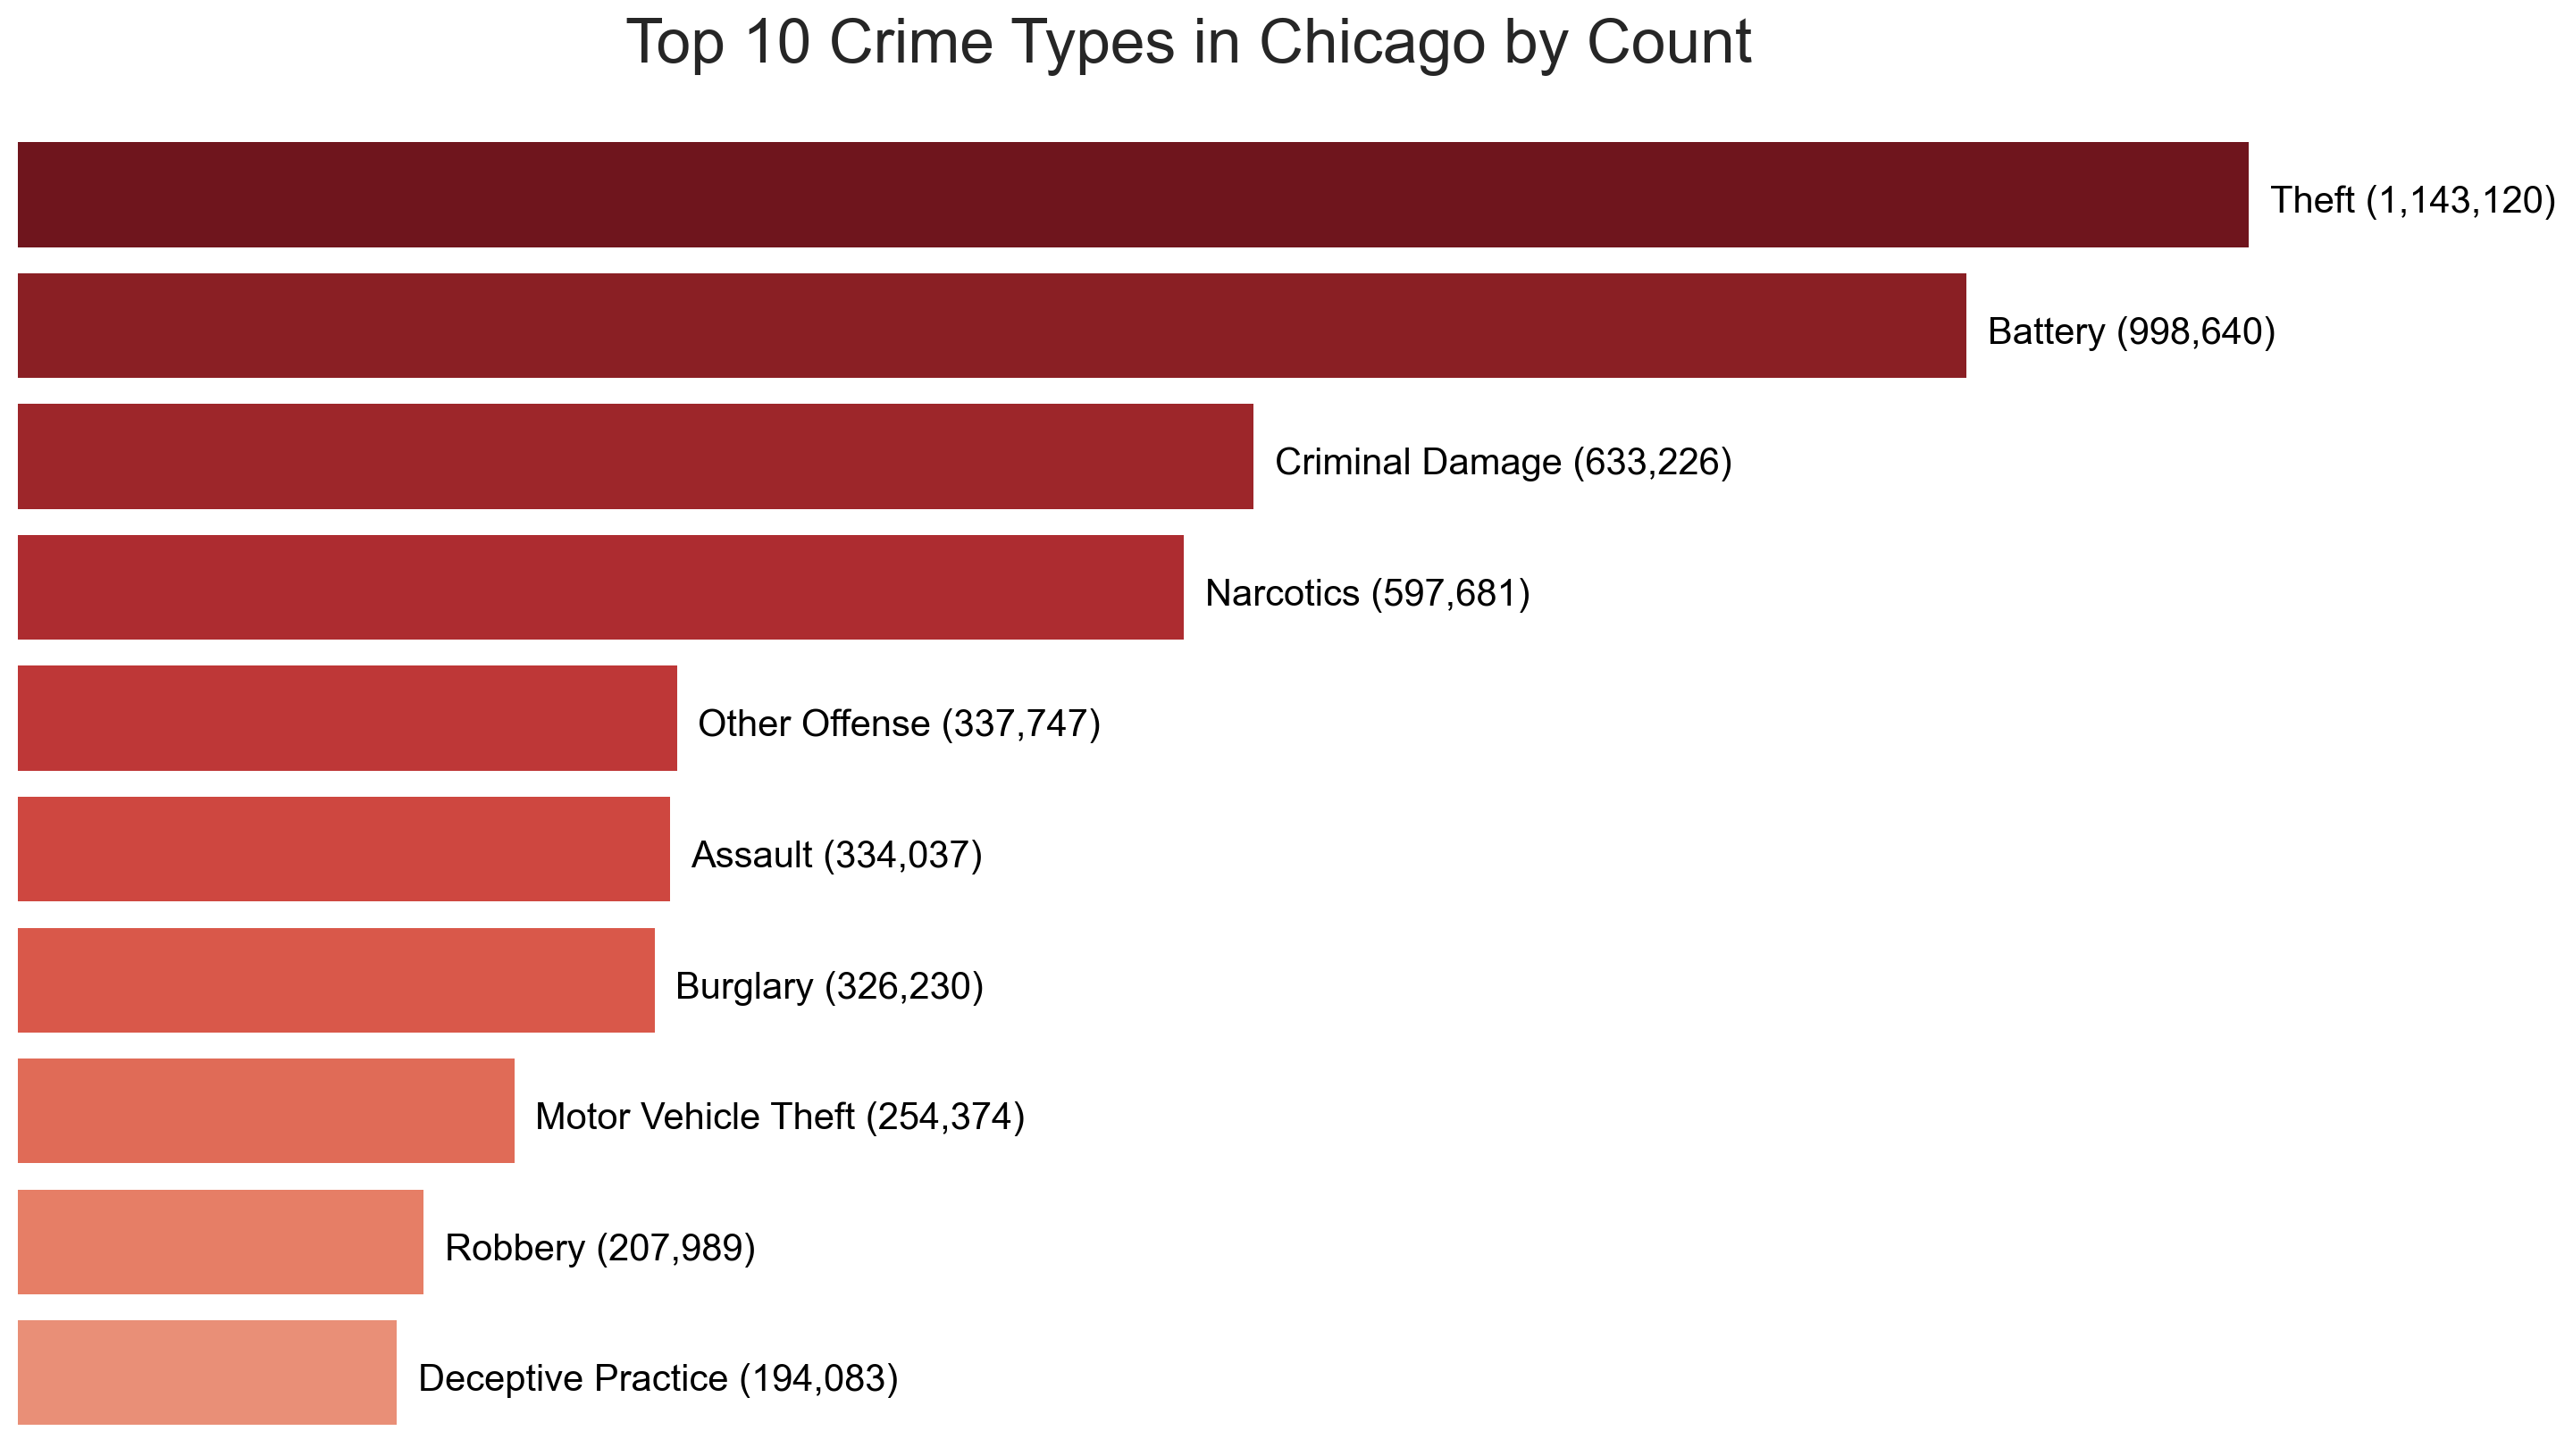

In [16]:
top_10_types = crimes.primary_type.value_counts()[:10] # Sort values in ascending order

x = top_10_types.index # Get x labels and order

fig, ax = plt.subplots(figsize=figsize) # Create figure and axes with default figure size

dark_reds = get_dark_colors(101, 6, 'Reds', 10)
dark_reds.reverse()

sb_barplot = sb.barplot(ax = ax, x = top_10_types, y = x, order = x, 
                        palette = dark_reds, edgecolor=None, linewidth=0) # Crea bar plot
sb.despine(left=True, bottom=True) # Remove plot borders
for crime, p in zip(x.values, sb_barplot.patches): # Add annotation for each patch
    sb_barplot.annotate(text       = crime + ' (' + format(int(p.get_width()), ',d') + ')', 
                        xy         = (p.get_width() - 40000, p.get_y() + p.get_height() * 0.57), 
                        ha         = 'left',
                        va         = 'center', 
                        xytext     = (40, 0), 
                        textcoords = 'offset points',
                        color = 'black',
                        size = 15)

plt.xticks(fontsize=15, color = 'black') # Increase x ticks labels font size
plt.xticks([]), plt.yticks([]) # Remove x and y ticks

plt.xlabel(''), plt.ylabel('') # Remove x and y labels

plt.title('Top 10 Crime Types in Chicago by Count', y = 1.04, fontsize = 25); # Add descriptive title

plt.tight_layout() # Improve appearance

plt.savefig('src/top_10_types.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file

<a id="id_3_7"></a>
## [**WordCloud by All the Crime Types**](#id_3_7)

[Back to Questions](#id_6)

In [5]:
crimes.primary_type = crimes.primary_type.apply(lambda x: 'Damage' if x == 'Criminal Damage'
                                                                     else('Trespass' if x == 'Criminal Trespass' 
                                                                          else('Sexual Assault' if x == 'Crim Sexual Assault'
                                                                              else('Non-Criminal' if x == 'Non - Criminal'
                                                                                  else(x)))))

crimes_counts = crimes.primary_type.value_counts()

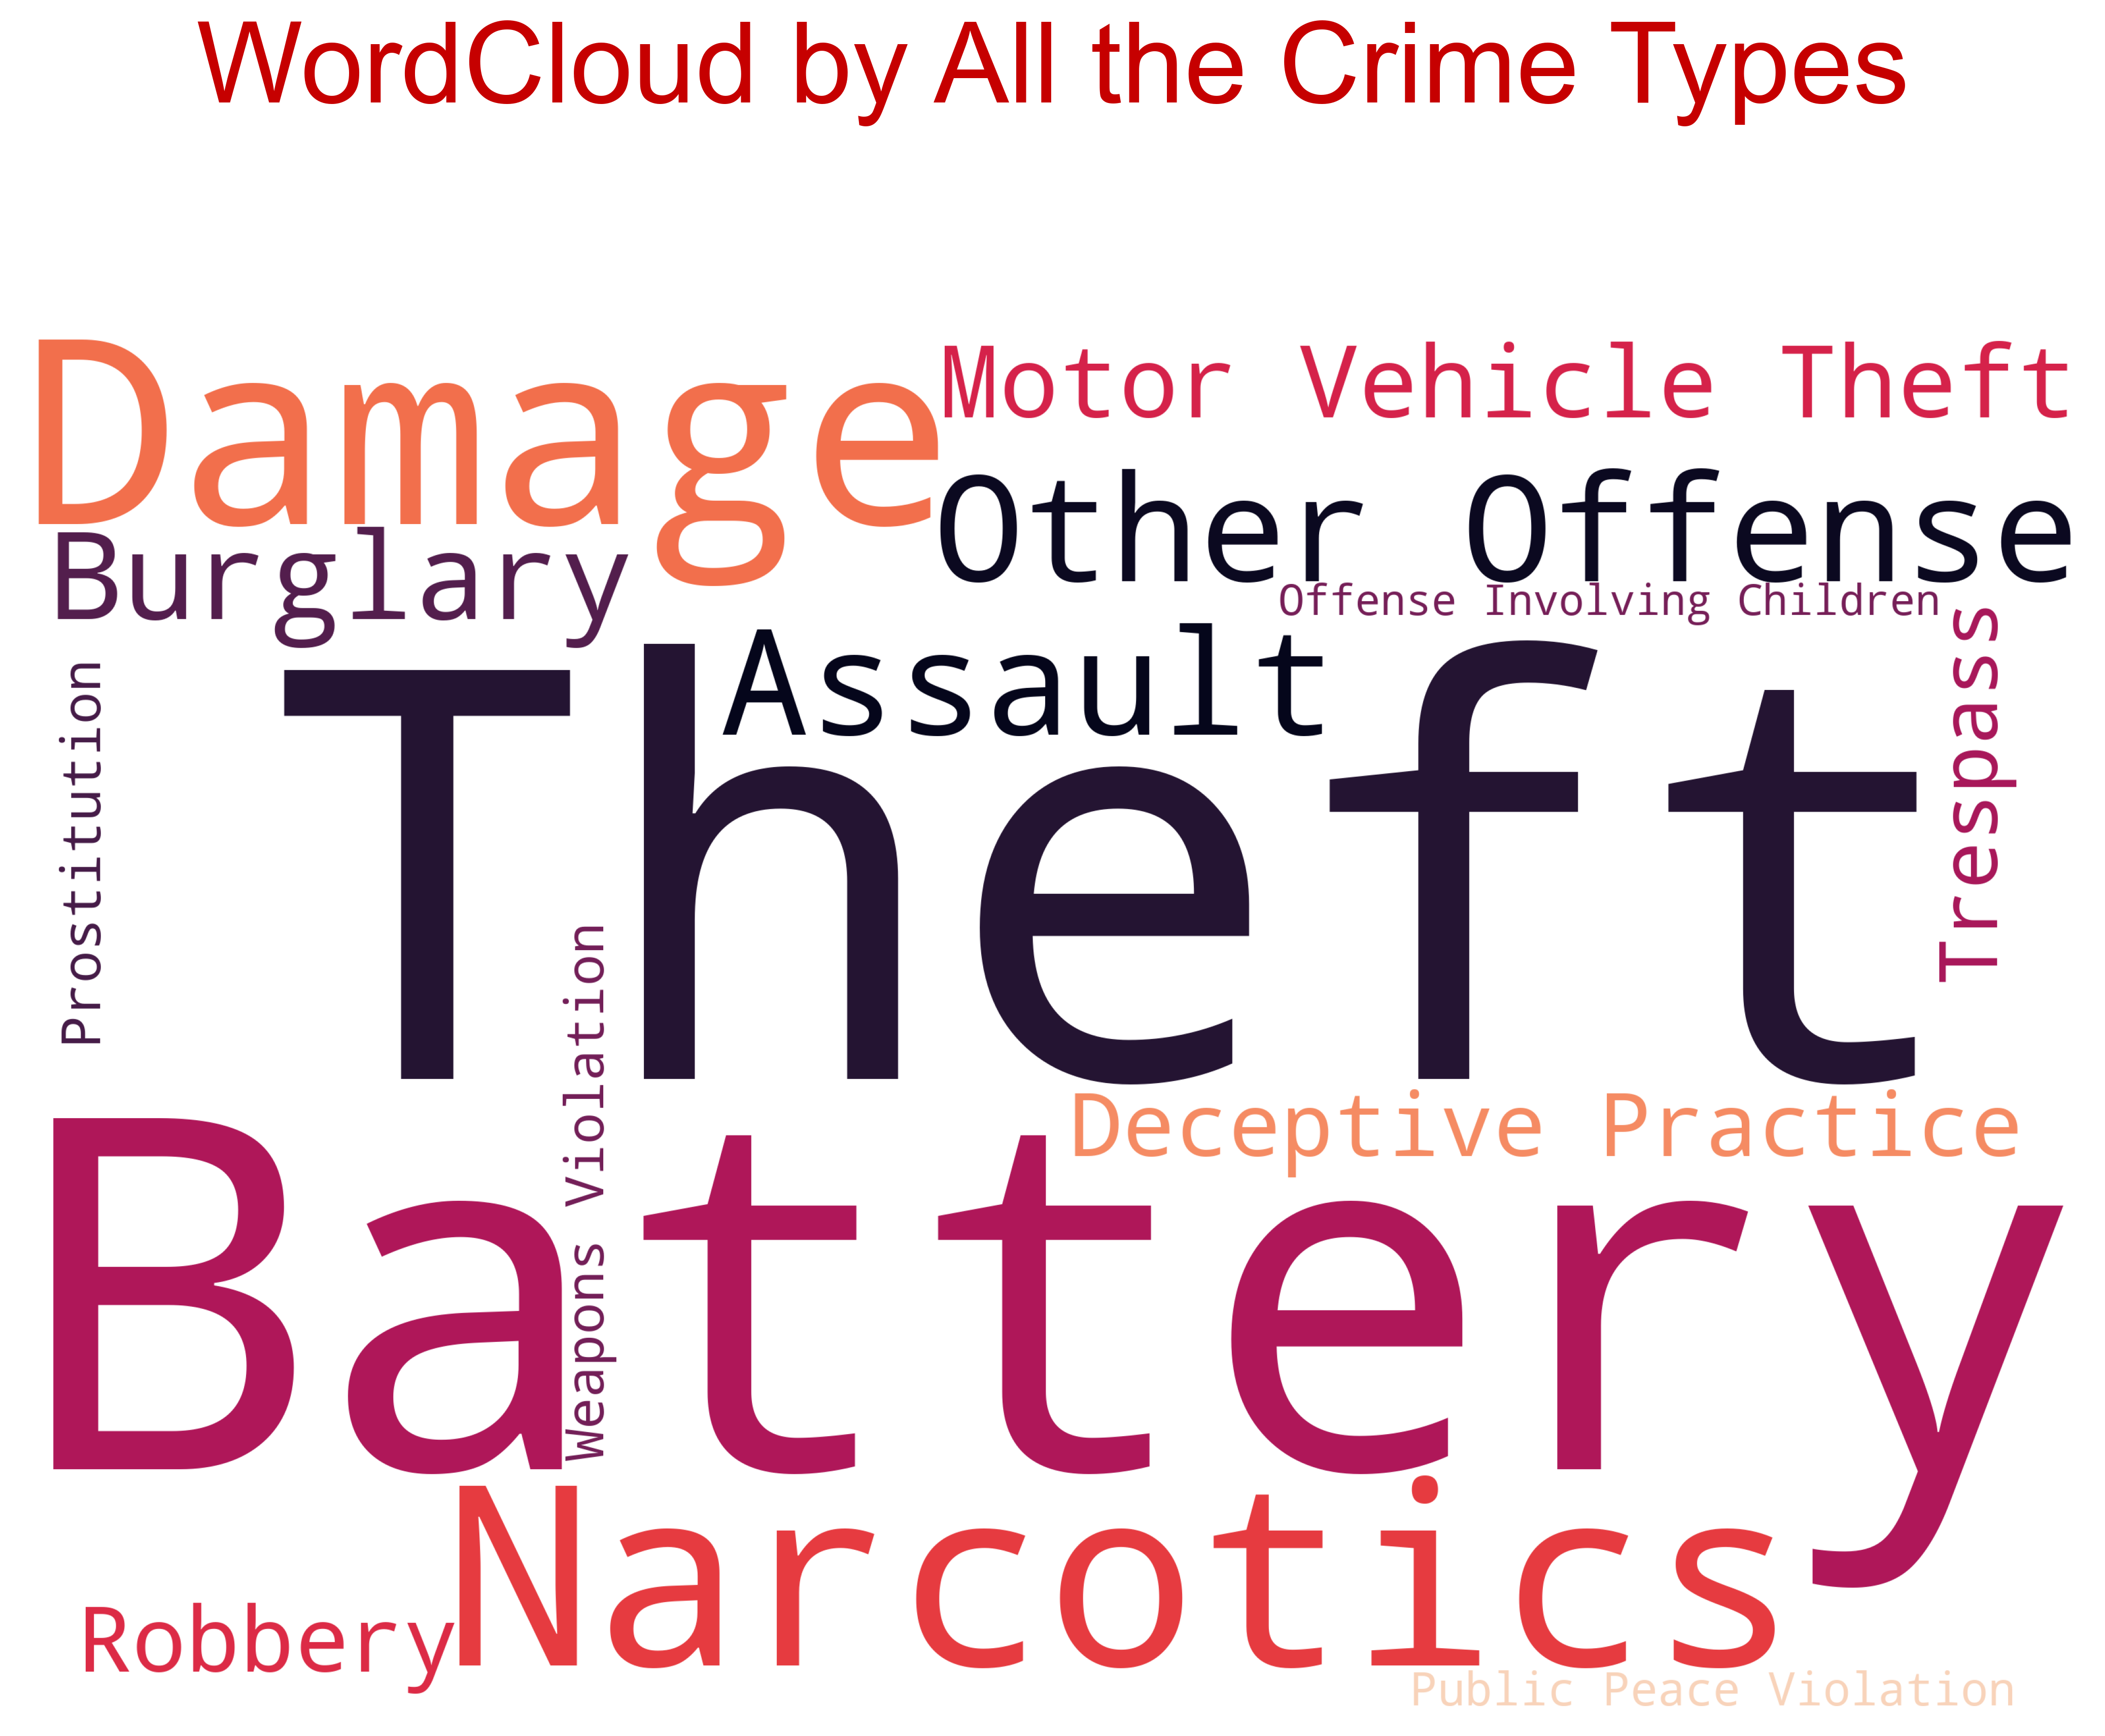

In [6]:
dard_reds = get_dark_colors(100, 7, 'Reds', 12)
dard_reds = LinearSegmentedColormap.from_list('mycmap', dard_reds)

wordcloud2 = WordCloud(width = 3000,
                       height = 2000,
                       background_color ='white',
                       random_state=1,
                       collocations=False,
                       min_font_size=50,
                       colormap='rocket').generate_from_frequencies(crimes_counts)

plt.figure(figsize=figsize)
plt.imshow(wordcloud2) 
plt.axis("off")

plt.title('WordCloud by All the Crime Types', y = 1.16, fontsize=40, color = '#c60000') # Set title
plt.tight_layout(pad = 0) 
  
plt.savefig('src/word_cloud.png', bbox_inches='tight', facecolor='white', pad_inches=1); # Save as png file

<a id="id_6_2"></a>
## [**What're the Top 4 Crimes for the Most Dangerous Locations in Chicago?**](#id_6_2)

[Back to Questions](#id_6)

In [17]:
# Get to 8 danger plcaes
top_8_danger_places = crimes.location_description.value_counts().drop('Other')[:8]
top_8_danger_places_df = crimes[crimes['location_description'].isin(top_8_danger_places.index.values)].reset_index(drop=True)

# Group by 'location_description' and 'primary_type'
group = top_8_danger_places_df.groupby(['location_description', 'primary_type']).count().dropna()

# Insert the Multi index level and rename 'id' column to 'count' and change 'count' to int data type
top_danger_plcaes = group['id'].reset_index().rename(columns={'id': 'count'})
top_danger_plcaes['count'] = top_danger_plcaes['count'].astype(int)
# Sort by 'location_description' and 'count'
top_danger_plcaes = top_danger_plcaes.sort_values(['location_description', 'count'], ascending=False).reset_index(drop=True)

# Rename some categorical values
top_danger_plcaes.location_description = top_danger_plcaes.location_description.apply(lambda 
                                             x: 'School, Public Building' if x == 'School, Public, Building'
                                                    else(x.replace('-', ' ') if x == 'Residence-Garage'
                                                        else('Parking Garage' if x == 'Parking Lot/Garage(Non.Resid.)'
                                                            else(x))))

# Add new categorical order
new_cate_order = ['Street', 'Sidewalk', 'Alley', 'School, Public Building', 
                  'Residence', 'Residence Garage', 'Parking Garage', 'Apartment']
top_danger_plcaes.location_description = pd.Categorical(top_danger_plcaes.location_description,
                                                        ordered=True,
                                                        categories=new_cate_order)
# Top danger plcaes
danger_plcaes = top_danger_plcaes.location_description.unique()
df_ls = []

# Get onlt top 4 type for each plcae
for place in danger_plcaes:
    place_df = top_danger_plcaes[top_danger_plcaes['location_description'] == place][:4]
    place_df = place_df.sort_values(['location_description', 'count'])
    df_ls.append(place_df)

# Add dfs and resort
top_danger_plcaes = pd.concat(df_ls, ignore_index = True, axis = 0)
top_danger_plcaes = top_danger_plcaes.sort_values(by=['location_description', 'count']).reset_index(drop=True)

In [18]:
# Set customized Colors
top_primary_types = top_danger_plcaes.primary_type.value_counts()
top_primary_types = top_primary_types[top_primary_types != 0].index.values

def get_my_colors(palette, n_color, types):
    sb_colors = sb.color_palette(palette, n_color)
    if len(sb.color_palette(palette)) != 10:
        sb_colors = sb.color_palette(palette) + ['#b98397', '#8ecbf3']
        
    crime_types_colors = {}
    for n, crime in enumerate(types):
        crime_types_colors[crime] = sb_colors[n]
    return crime_types_colors

def add_custome_legend(color_dic, fontsize, x ,y, fig, handle):
    # Add custome legend
    handle_ls = []
    if handle == 'patch':
        for k,v in color_dic.items():
            handle_ls.append(mpatches.Patch(color=v, label=k))
    else:
        for k,v in color_dic.items():
            handle_ls.append(Line2D([0], [0], color=v, label=k, lw=4))
    
    fig.legend(handles = handle_ls,
               fontsize = fontsize,
               frameon = False,
               bbox_to_anchor = [x ,y])

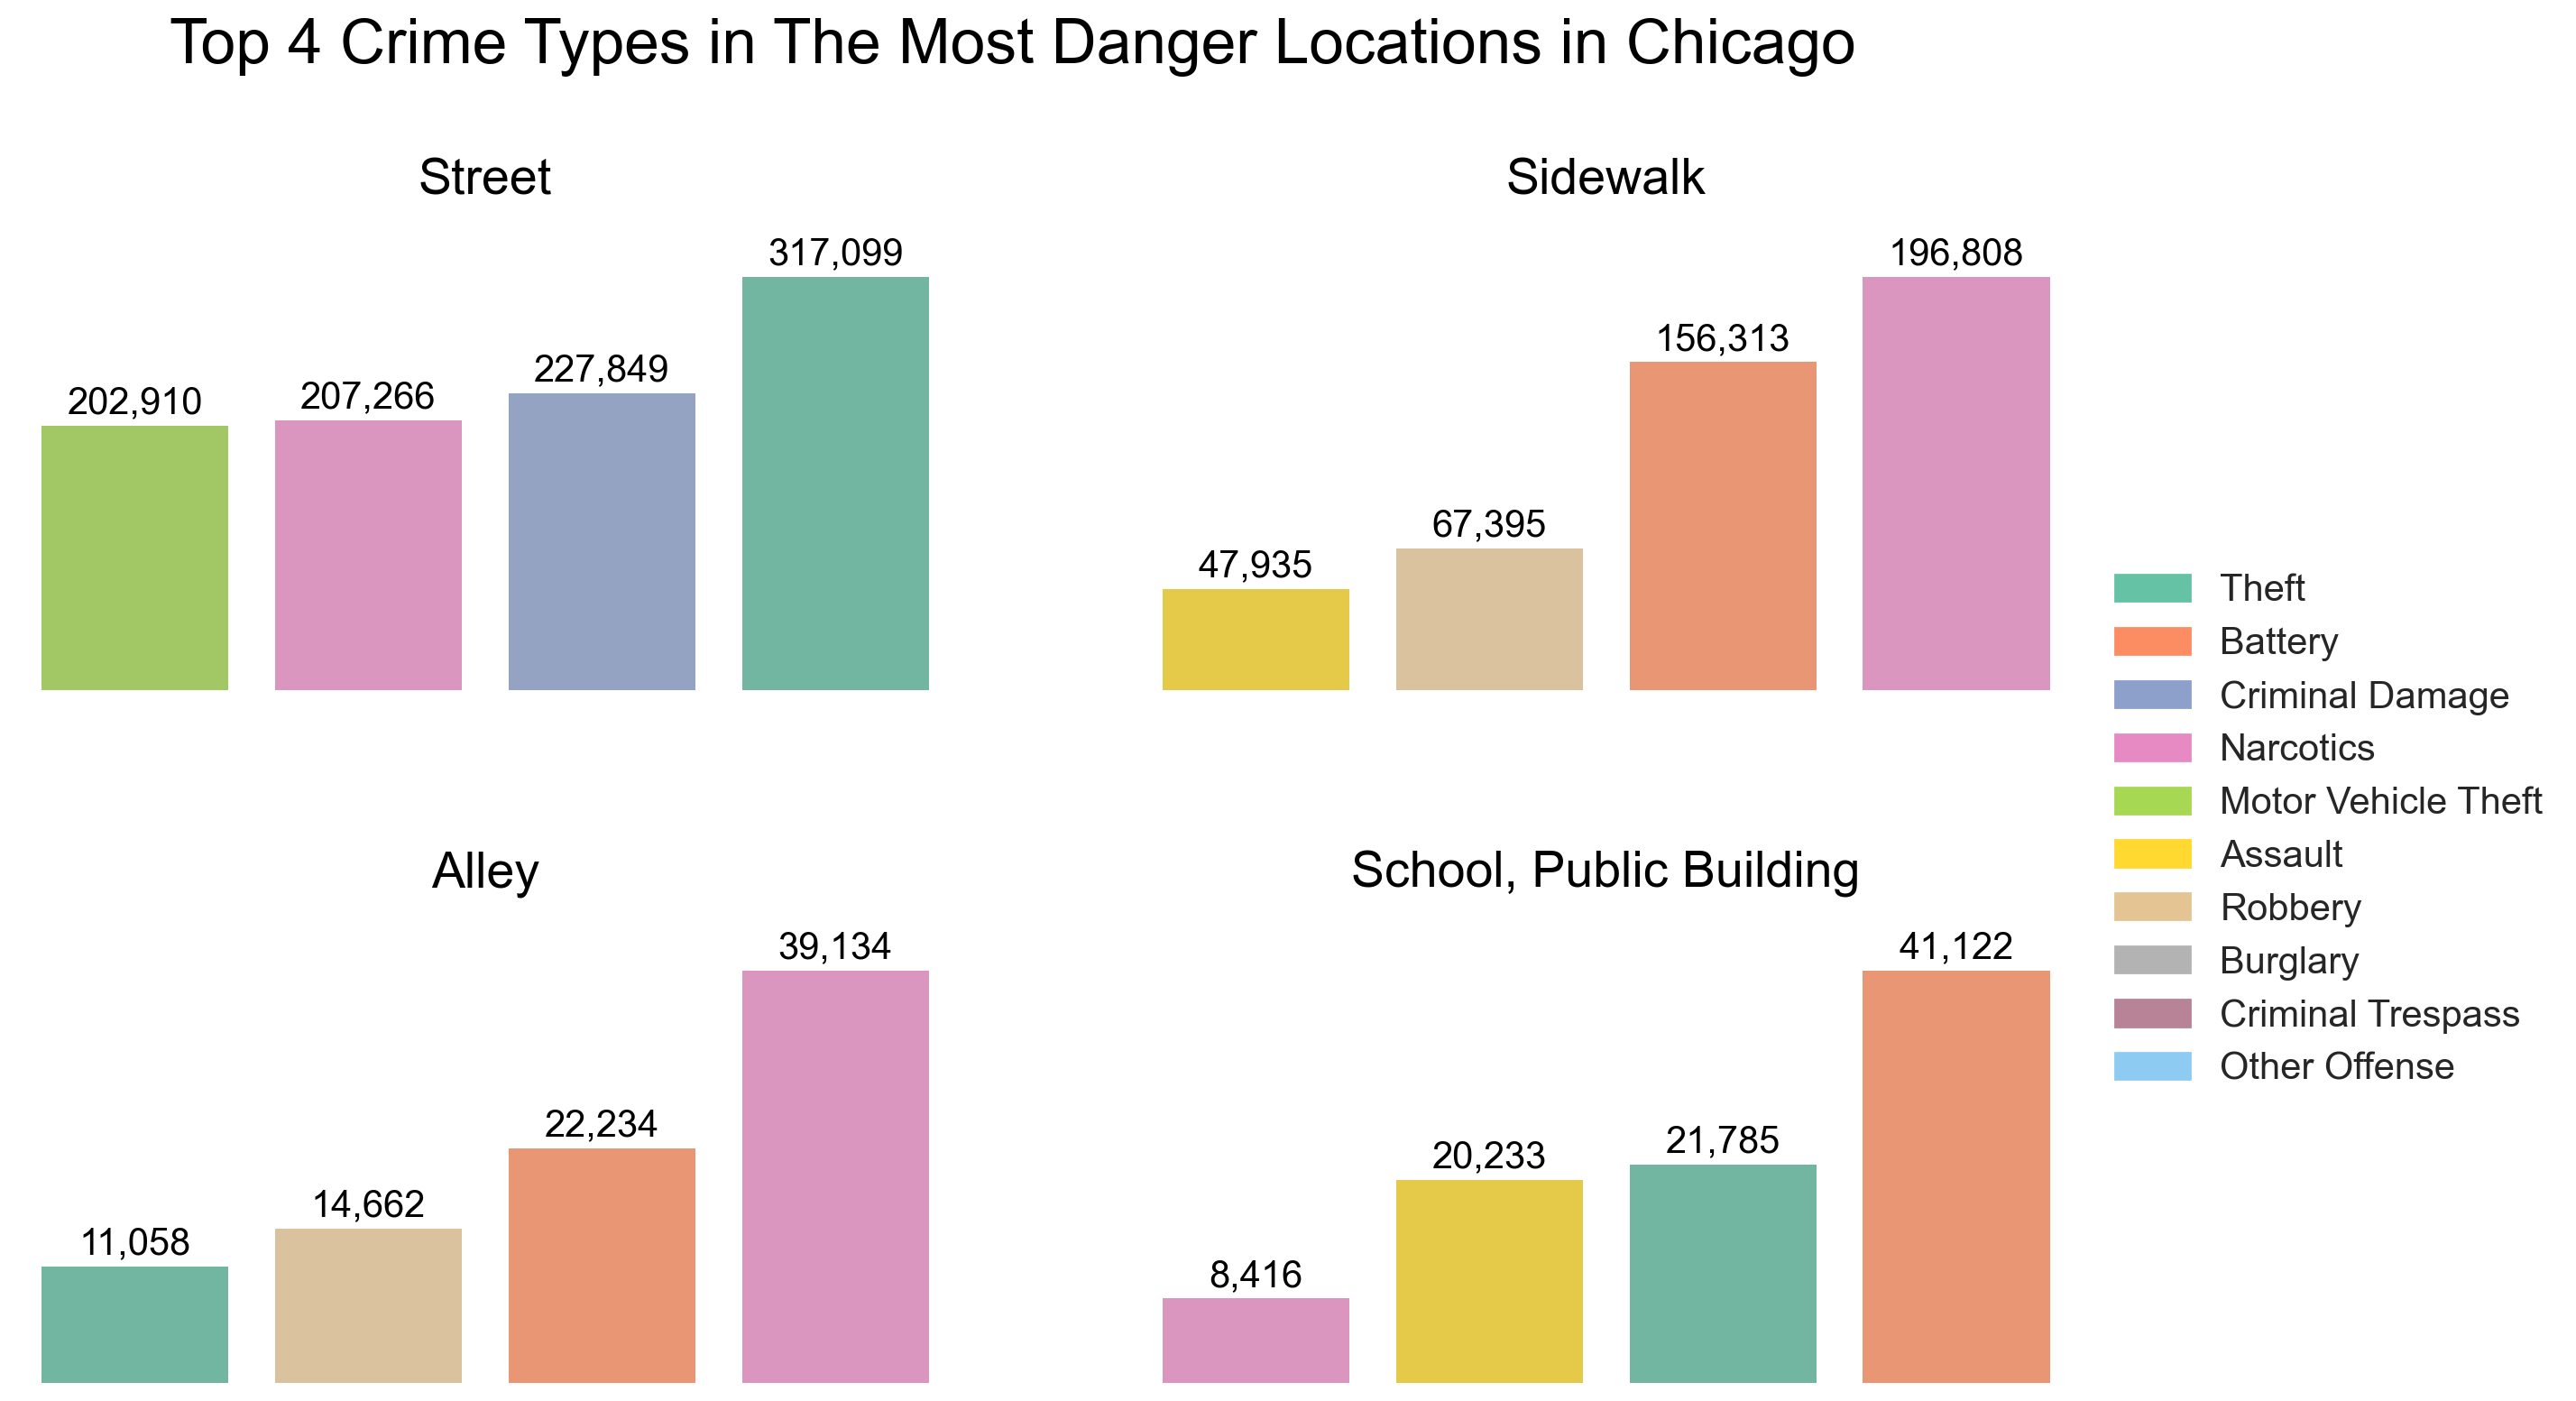

In [19]:
def set_4_plots(start_edge, end_edge, save_num):
    # Create figure with 3*2 subplots
    fig, axes_sub = plt.subplots(2, 2, figsize=figsize) # Create figure and axes with default figure size
    
    fig.subplots_adjust(hspace=0.6)

    # Flatten axes array
    axes = axes_sub.flatten()
    
    # Add common title
    fig.suptitle('Top 4 Crime Types in The Most Danger Locations in Chicago', fontsize=25, y = 1.04, color = 'black')
     
    color_dic = get_my_colors('Set2', 10, top_primary_types)
        
    for ax_n, place in enumerate(danger_plcaes.sort_values()[start_edge : end_edge]):
        ax = axes[ax_n] # Current axis
        
        # Subsetting the data to the current crime
        place_df = top_danger_plcaes[top_danger_plcaes['location_description'] == place] 
        types = place_df.primary_type.values
        color_palette = {}
        for t in types:
            color_palette[t] = color_dic[t]
        
        # Add barplot
        barplot = sb.barplot(ax = ax, x = list(place_df.primary_type), y = place_df['count'], 
                             palette = color_palette, edgecolor=None, linewidth=0)
        
        # Add title for the current plot
        ax.set_title(place, fontsize = 20, color = 'black', y = 1.11)
        
        # Remove labels from axes
        ax.set_xlabel(''), ax.set_ylabel(''), ax.set_yticklabels(''), ax.set_xticklabels('')
        
        ax.set_facecolor('xkcd:white') # Setting face color to white
        
        sb.despine(left=True, bottom=True) # Remove plot borders
        
        for p in barplot.patches: # Add annotation for each patch
            barplot.annotate(text       = format(int(p.get_height()), ',d'),
                             xy         = (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha         = 'center', va = 'center',
                             xytext     = (0, 9),
                             textcoords = 'offset points',
                             color='black',
                             size = 15)
    
    add_custome_legend(color_dic=color_dic, fontsize=15, x=1.09, y=0.69, fig=fig, handle='patch')
    #plt.tight_layout() # Improve appearance

    plt.savefig(f'src/top_danger_plcaes{save_num}.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file
    
set_4_plots(0, 4, 1)

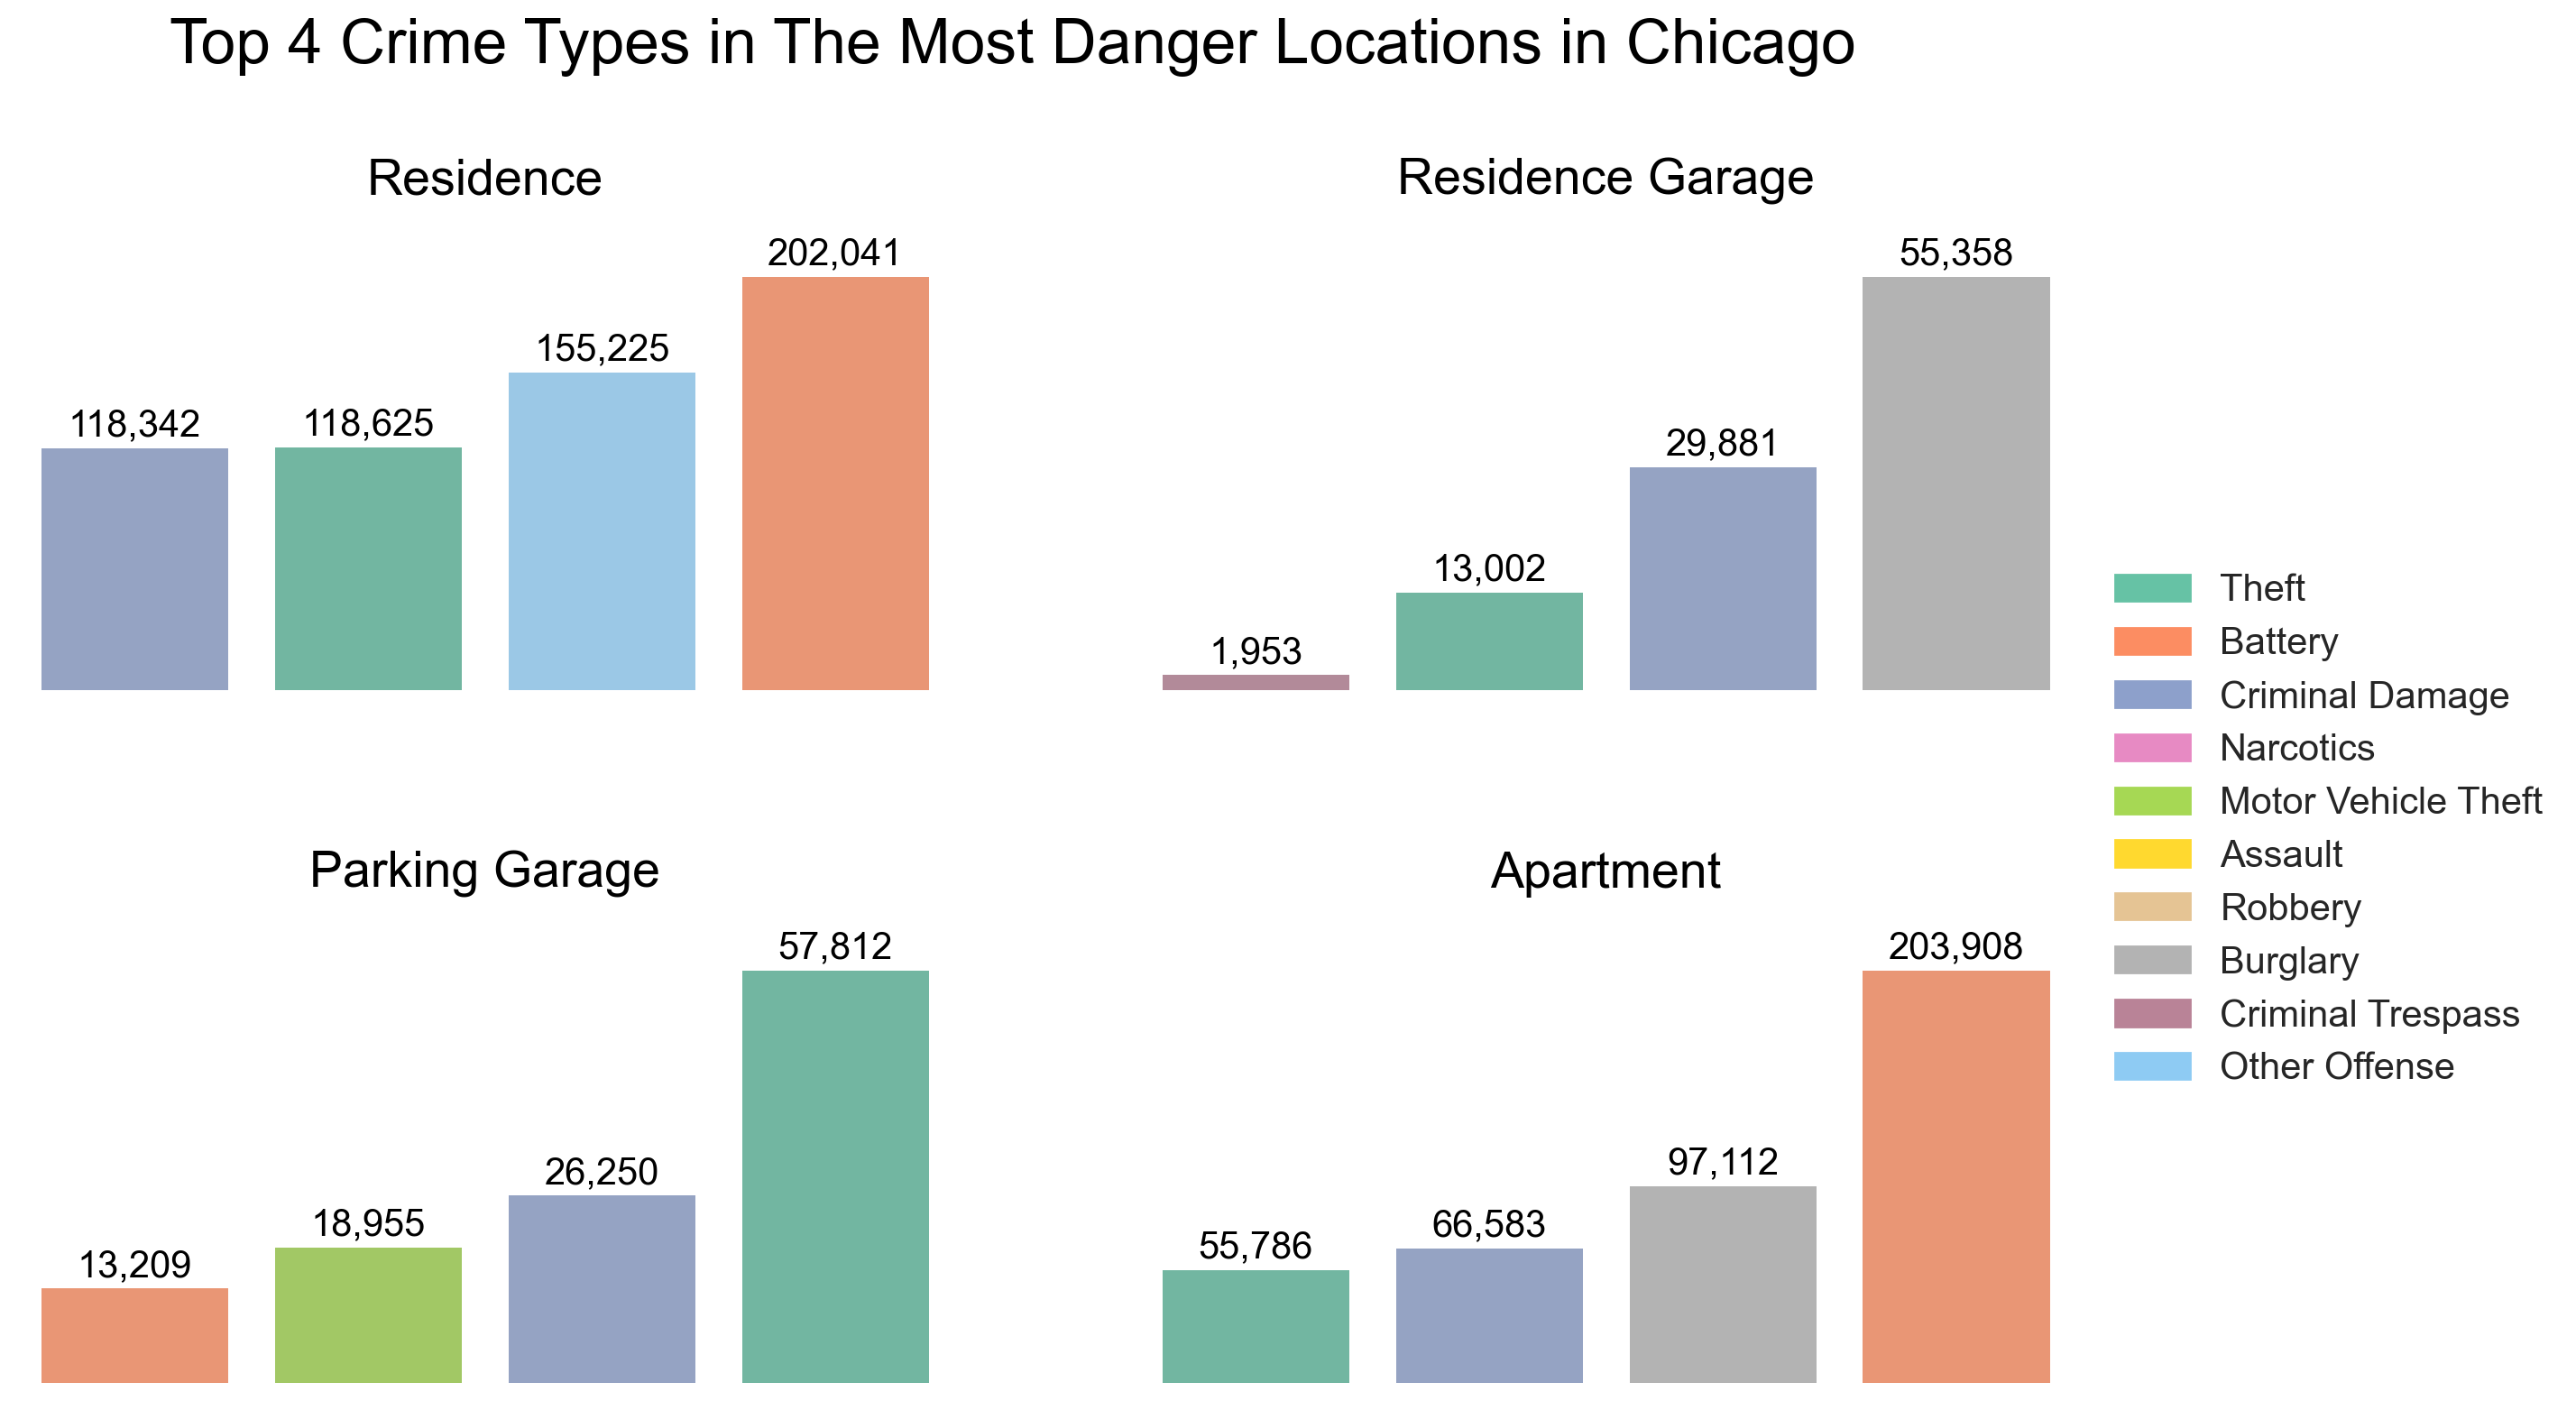

In [20]:
set_4_plots(4, 9, 2)

<a id="id_6_3"></a>
## [**What're the Top Crimes Related to Domestic Violence?**](#id_6_3)

[Back to Questions](#id_6)

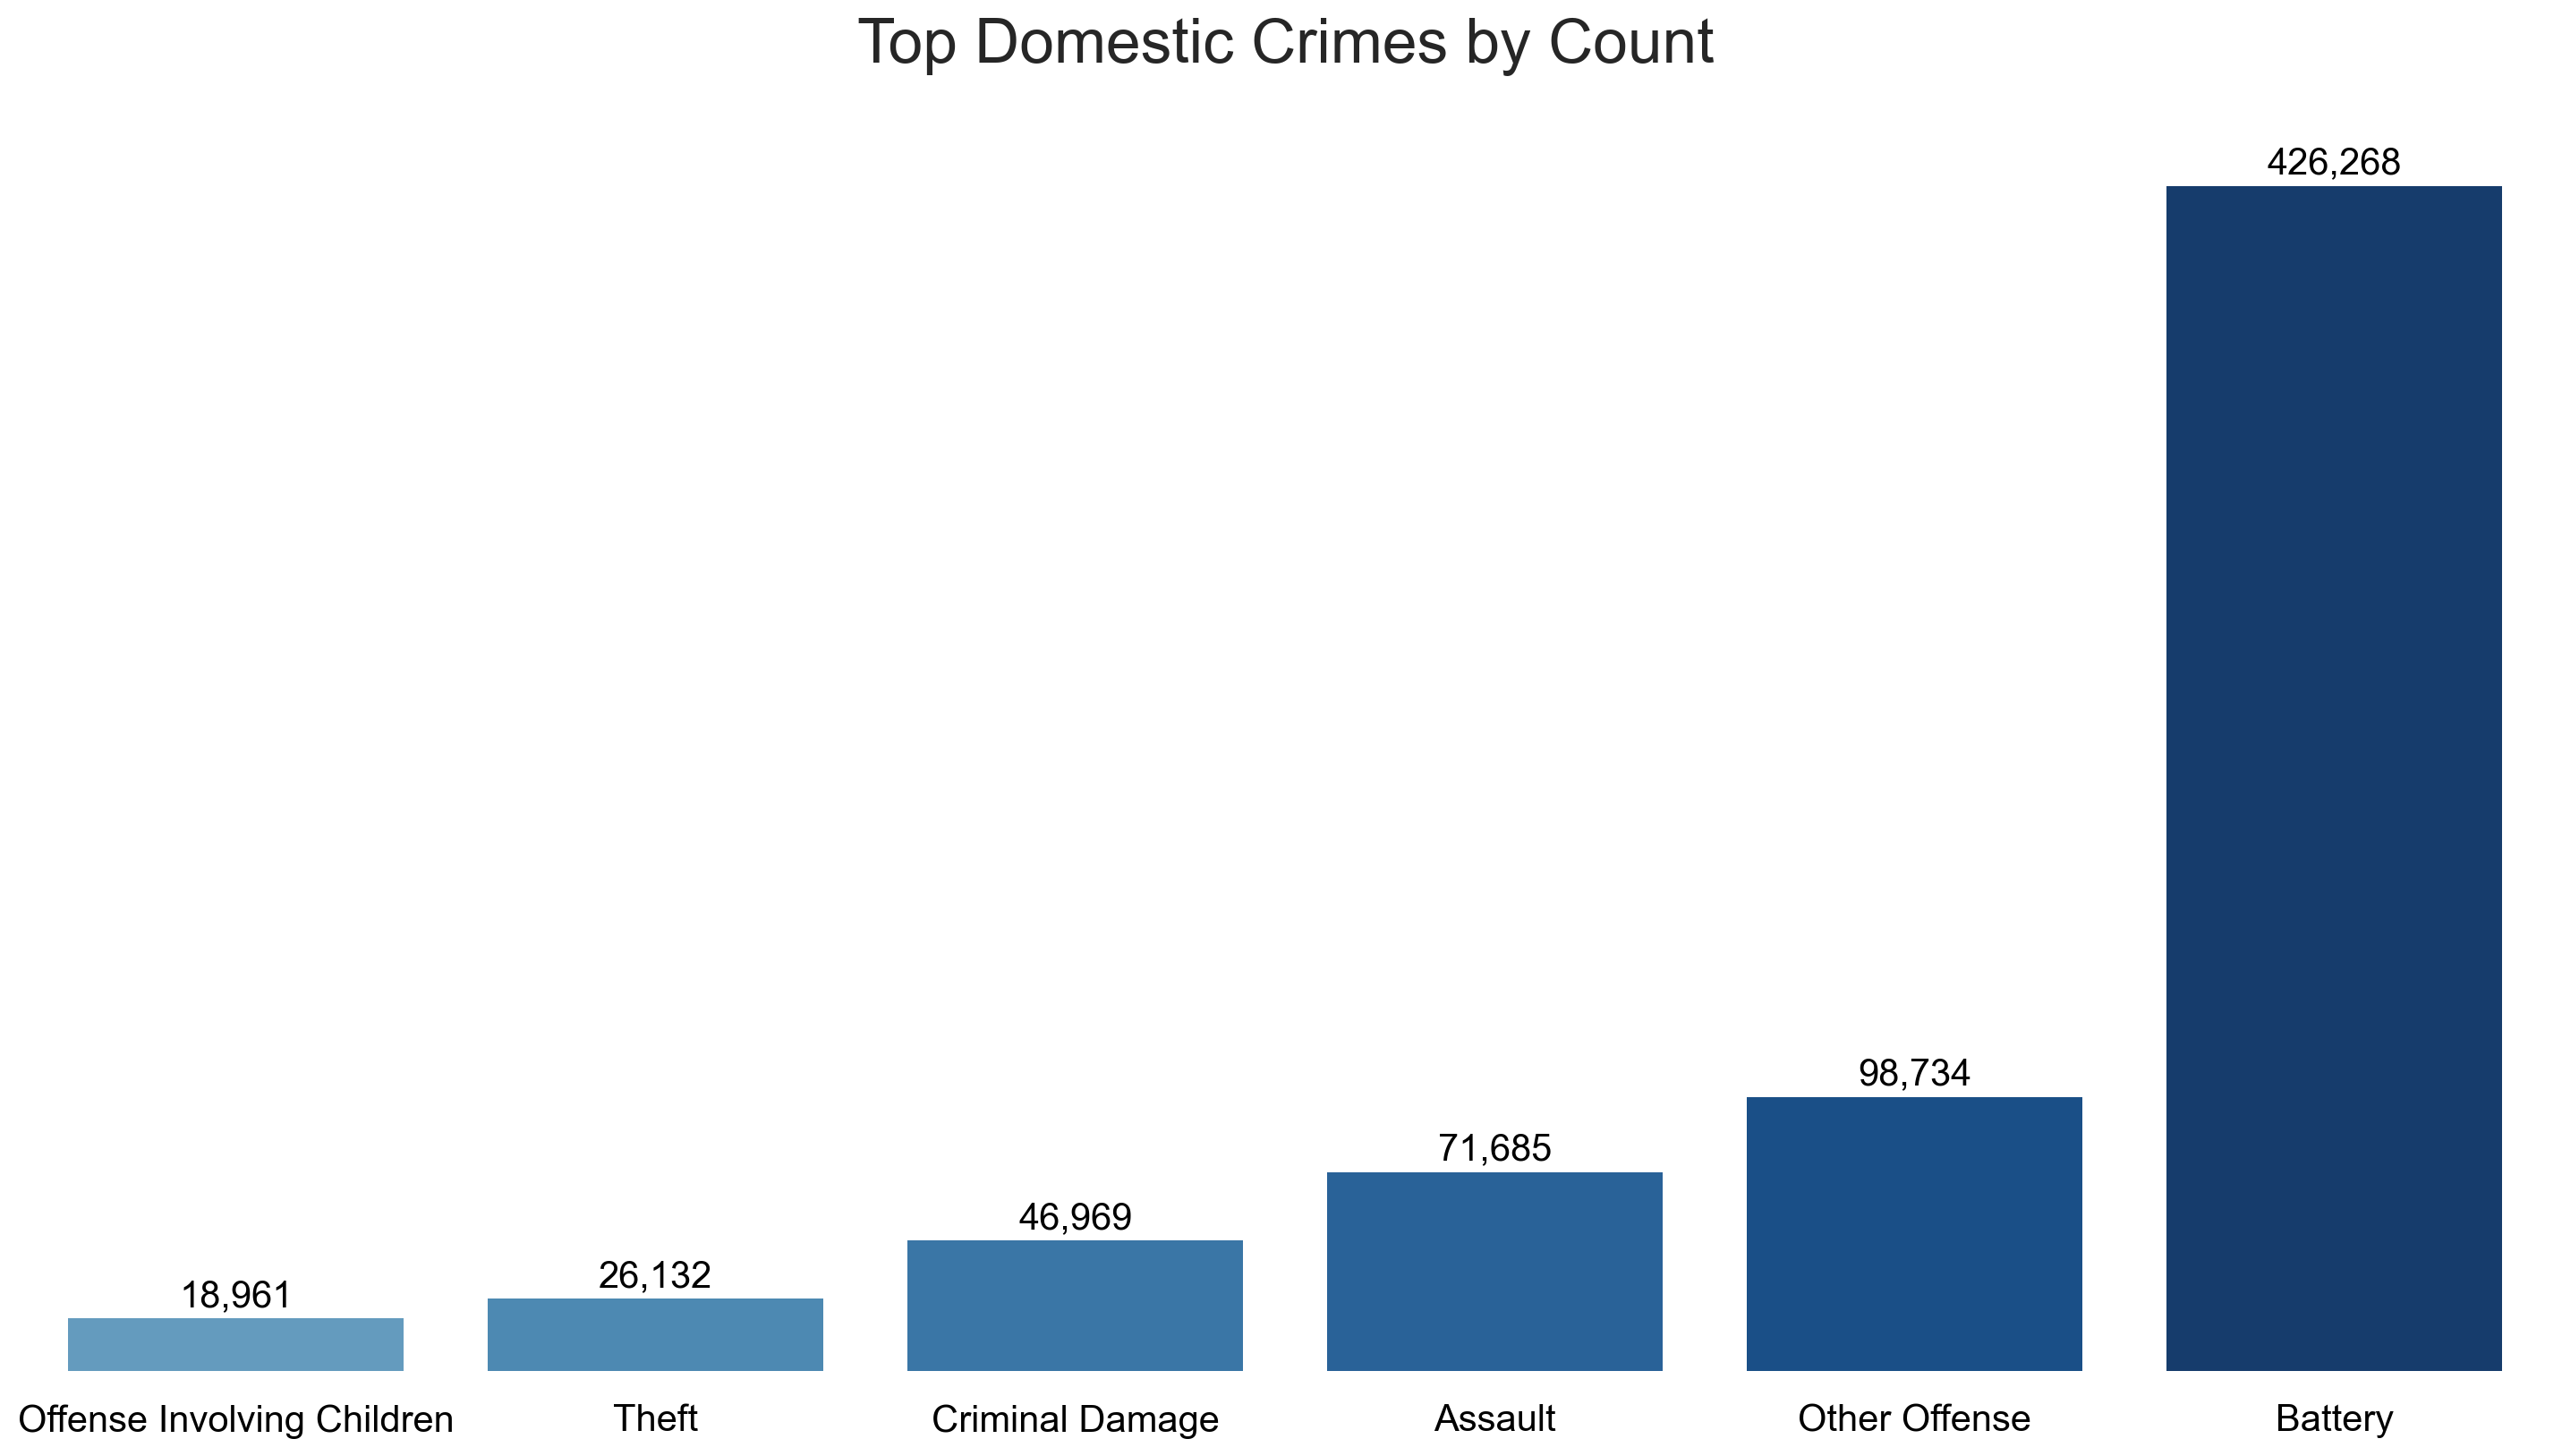

In [21]:
top_domestic_crimes = crimes[crimes['domestic']].reset_index(drop=True).primary_type.value_counts()[:6].sort_values()
x = list(top_domestic_crimes.index.values) # Get x labels and order

fig, ax = plt.subplots(figsize=figsize) # Create figure and axes with default figure size

dark_blues = get_dark_colors(50, 4, 'Blues', 6)

sb_barplot = sb.barplot(ax = ax, x = x, y = top_domestic_crimes, order = x, 
                        palette = dark_blues, edgecolor=None, linewidth=0) # Crea bar plot
sb.despine(left=True, bottom=True) # Remove plot borders

for p in sb_barplot.patches: # Add annotation for each patch
    sb_barplot.annotate(text       = format(int(p.get_height()), ',d'),
                        xy         = (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha         = 'center', va = 'center',
                        xytext     = (0, 9),
                        textcoords = 'offset points',
                        color='black',
                        size = 15)

plt.xticks(fontsize=15, color = 'black') # Increase x ticks labels font size
plt.yticks([]), plt.xlabel(''), plt.ylabel('') # Remove ticks and label

plt.title('Top Domestic Crimes by Count', y = 1.04, fontsize = 25); # Add descriptive title

plt.tight_layout() # Improve appearance

plt.savefig('src/top_domestic_crimes.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file

<a id="id_6_4"></a>
## [**What's the Relationship between Police Performance and Total Crimes Over Years?**](#id_6_4)

[Back to Questions](#id_6)

In [22]:
# Get the year for each record
arrest_year = crimes[['id', 'arrest']].merge(dates[['id', 'year']], on='id')
# Drop years 2001 and 2017 due to the short in records
arrest_year.drop(arrest_year[arrest_year['year'] == 2001].index, inplace=True)
arrest_year.drop(arrest_year[arrest_year['year'] == 2017].index, inplace=True)
arrest_year.reset_index(drop=True, inplace=True)

# Group by year
group_year = arrest_year.groupby('year')['arrest']
# divide the successful arrests by the total arrests to get success ratio
success_ratio = ((group_year.sum() / group_year.count()) * 100)
tot_crimes_year = arrest_year.groupby('year')['id'].count()

In [23]:
def set_y_ticks(ax, up_edge, step, str_suff, color):
    y_ticks = ax.get_yticks()
    y_ticks_new = np.arange(0, y_ticks.max()+up_edge, step)
    if str_suff == 'k':
        y_ticks_labels = [str(int(x))[:-3]+str_suff if x != 0 else str(int(x)) for x in y_ticks_new]
    else:
        y_ticks_labels = [str(int(x))+str_suff for x in y_ticks_new]
    ax.set_yticks(y_ticks_new), ax.set_yticklabels(y_ticks_labels, fontsize=15, color = color)

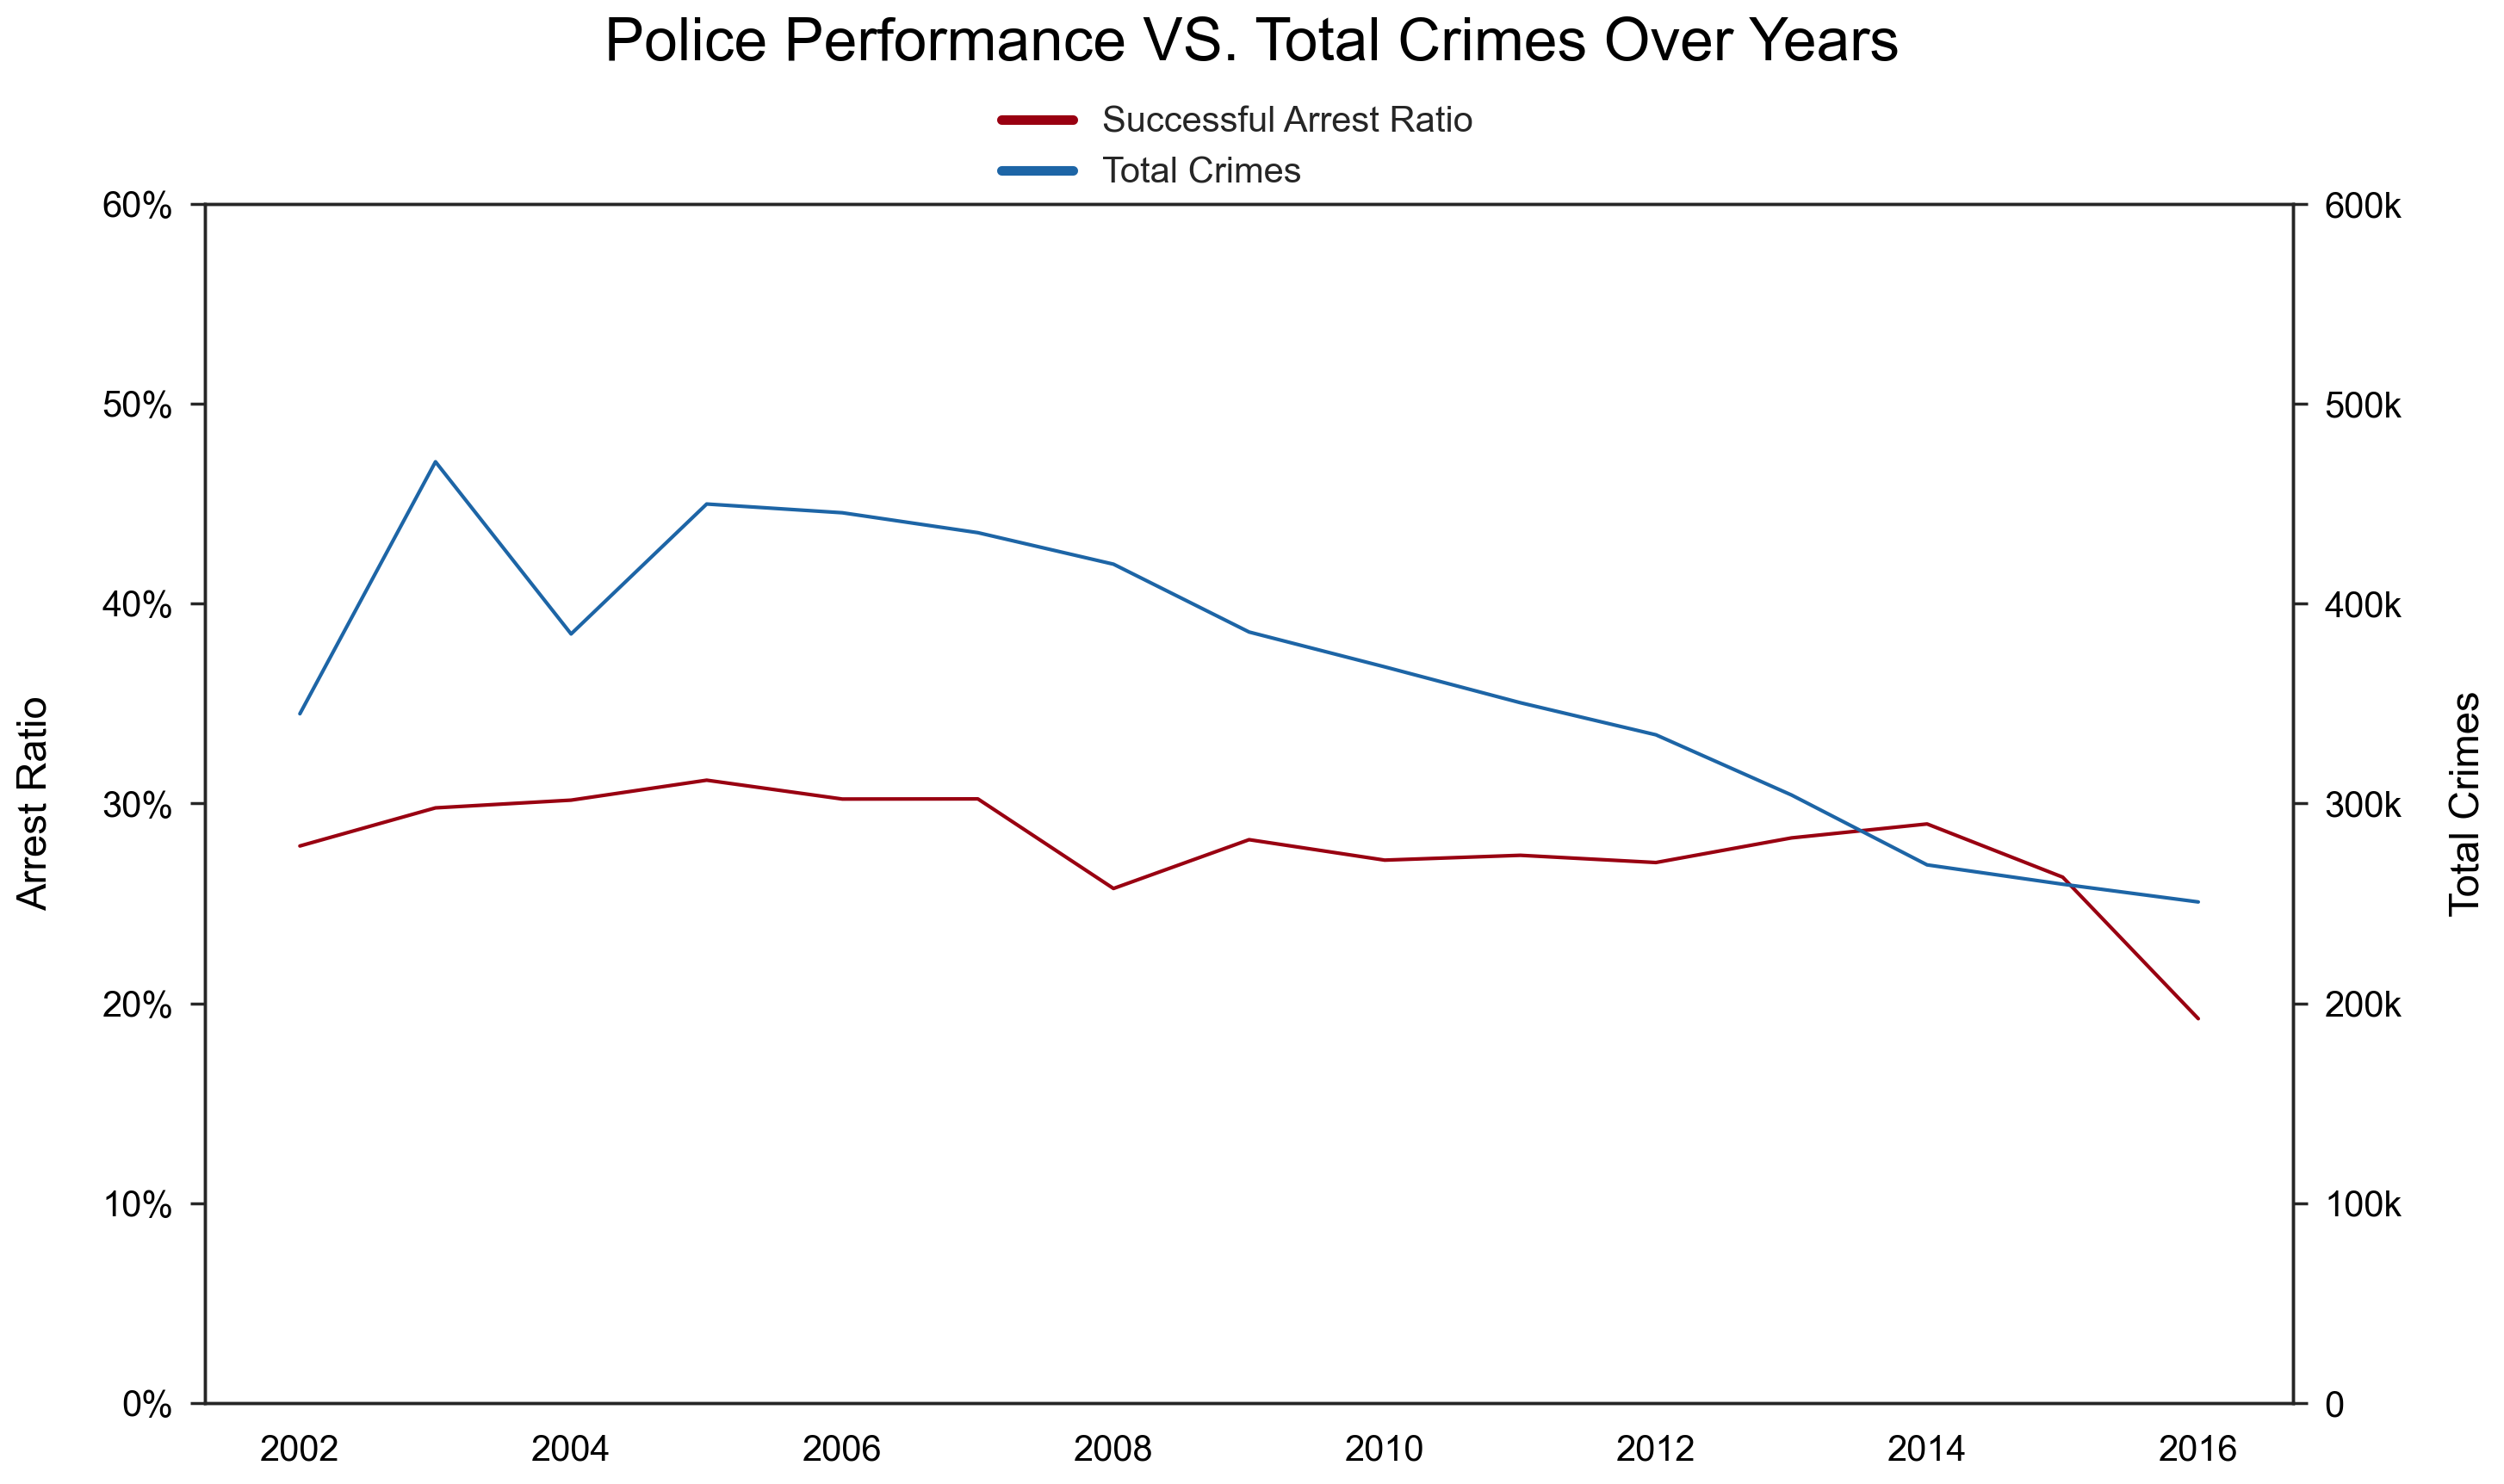

In [24]:
fig, ax = plt.subplots(1, 1, figsize=figsize) # Create figure and axes with default figure size
ax_color, ax2_color = '#990011FF', '#1D65A6'

# Add common title
fig.suptitle('Police Performance VS. Total Crimes Over Years', fontsize=25, y = 1.04, color = 'black')

sb.lineplot(ax = ax, x = list(success_ratio.index), y = success_ratio, ci=0, color=ax_color) 

x_ticks = ax.get_xticks()
x_ticks[0] = 2000.5
x_ticks_labels = [str(int(x)) for x in x_ticks]
x_ticks_labels[0], x_ticks_labels[-1] = '', ''
ax.set_xticks(x_ticks), ax.set_xticklabels(x_ticks_labels, fontsize=15, color = 'black')

set_y_ticks(ax=ax, up_edge=30, step=10, str_suff='%', color='black')

ax2 = ax.twinx()
sb.lineplot(ax = ax2, x = list(tot_crimes_year.index), y = tot_crimes_year, ci=0, color=ax2_color) 
set_y_ticks(ax=ax2, up_edge=200000, step=100000, str_suff='k', color='black')

ax.set_xlabel('')
ax.set_ylabel('Arrest Ratio', fontsize=17, color='black', labelpad=20)
ax2.set_ylabel('Total Crimes', fontsize=17, color='black', labelpad=20)

ax.set_facecolor('xkcd:white') # Setting face color to white

legend_colors = {'Successful Arrest Ratio': ax_color,
                 'Total Crimes': ax2_color}
add_custome_legend(color_dic=legend_colors, fontsize=15, x=0.6 ,y=1, fig=fig, handle='line')

plt.tight_layout() # Improve appearance
plt.savefig('src/success_aresst_ratio.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file

<a id="id_6_5"></a>
## [**What's the Distribution of the Money-Driven Crimes by Month and Weekday?**](#id_6_5)

[Back to Questions](#id_6)

In [25]:
money_crimes_names = ['Theft', 'Burglary', 'Motor Vehicle Theft', 'Robbery']
money_crimes = crimes[['id', 'primary_type']].merge(dates[['id', 'month', 'weekday']])
money_crimes = money_crimes[money_crimes['primary_type'].isin(money_crimes_names)].reset_index(drop=True)

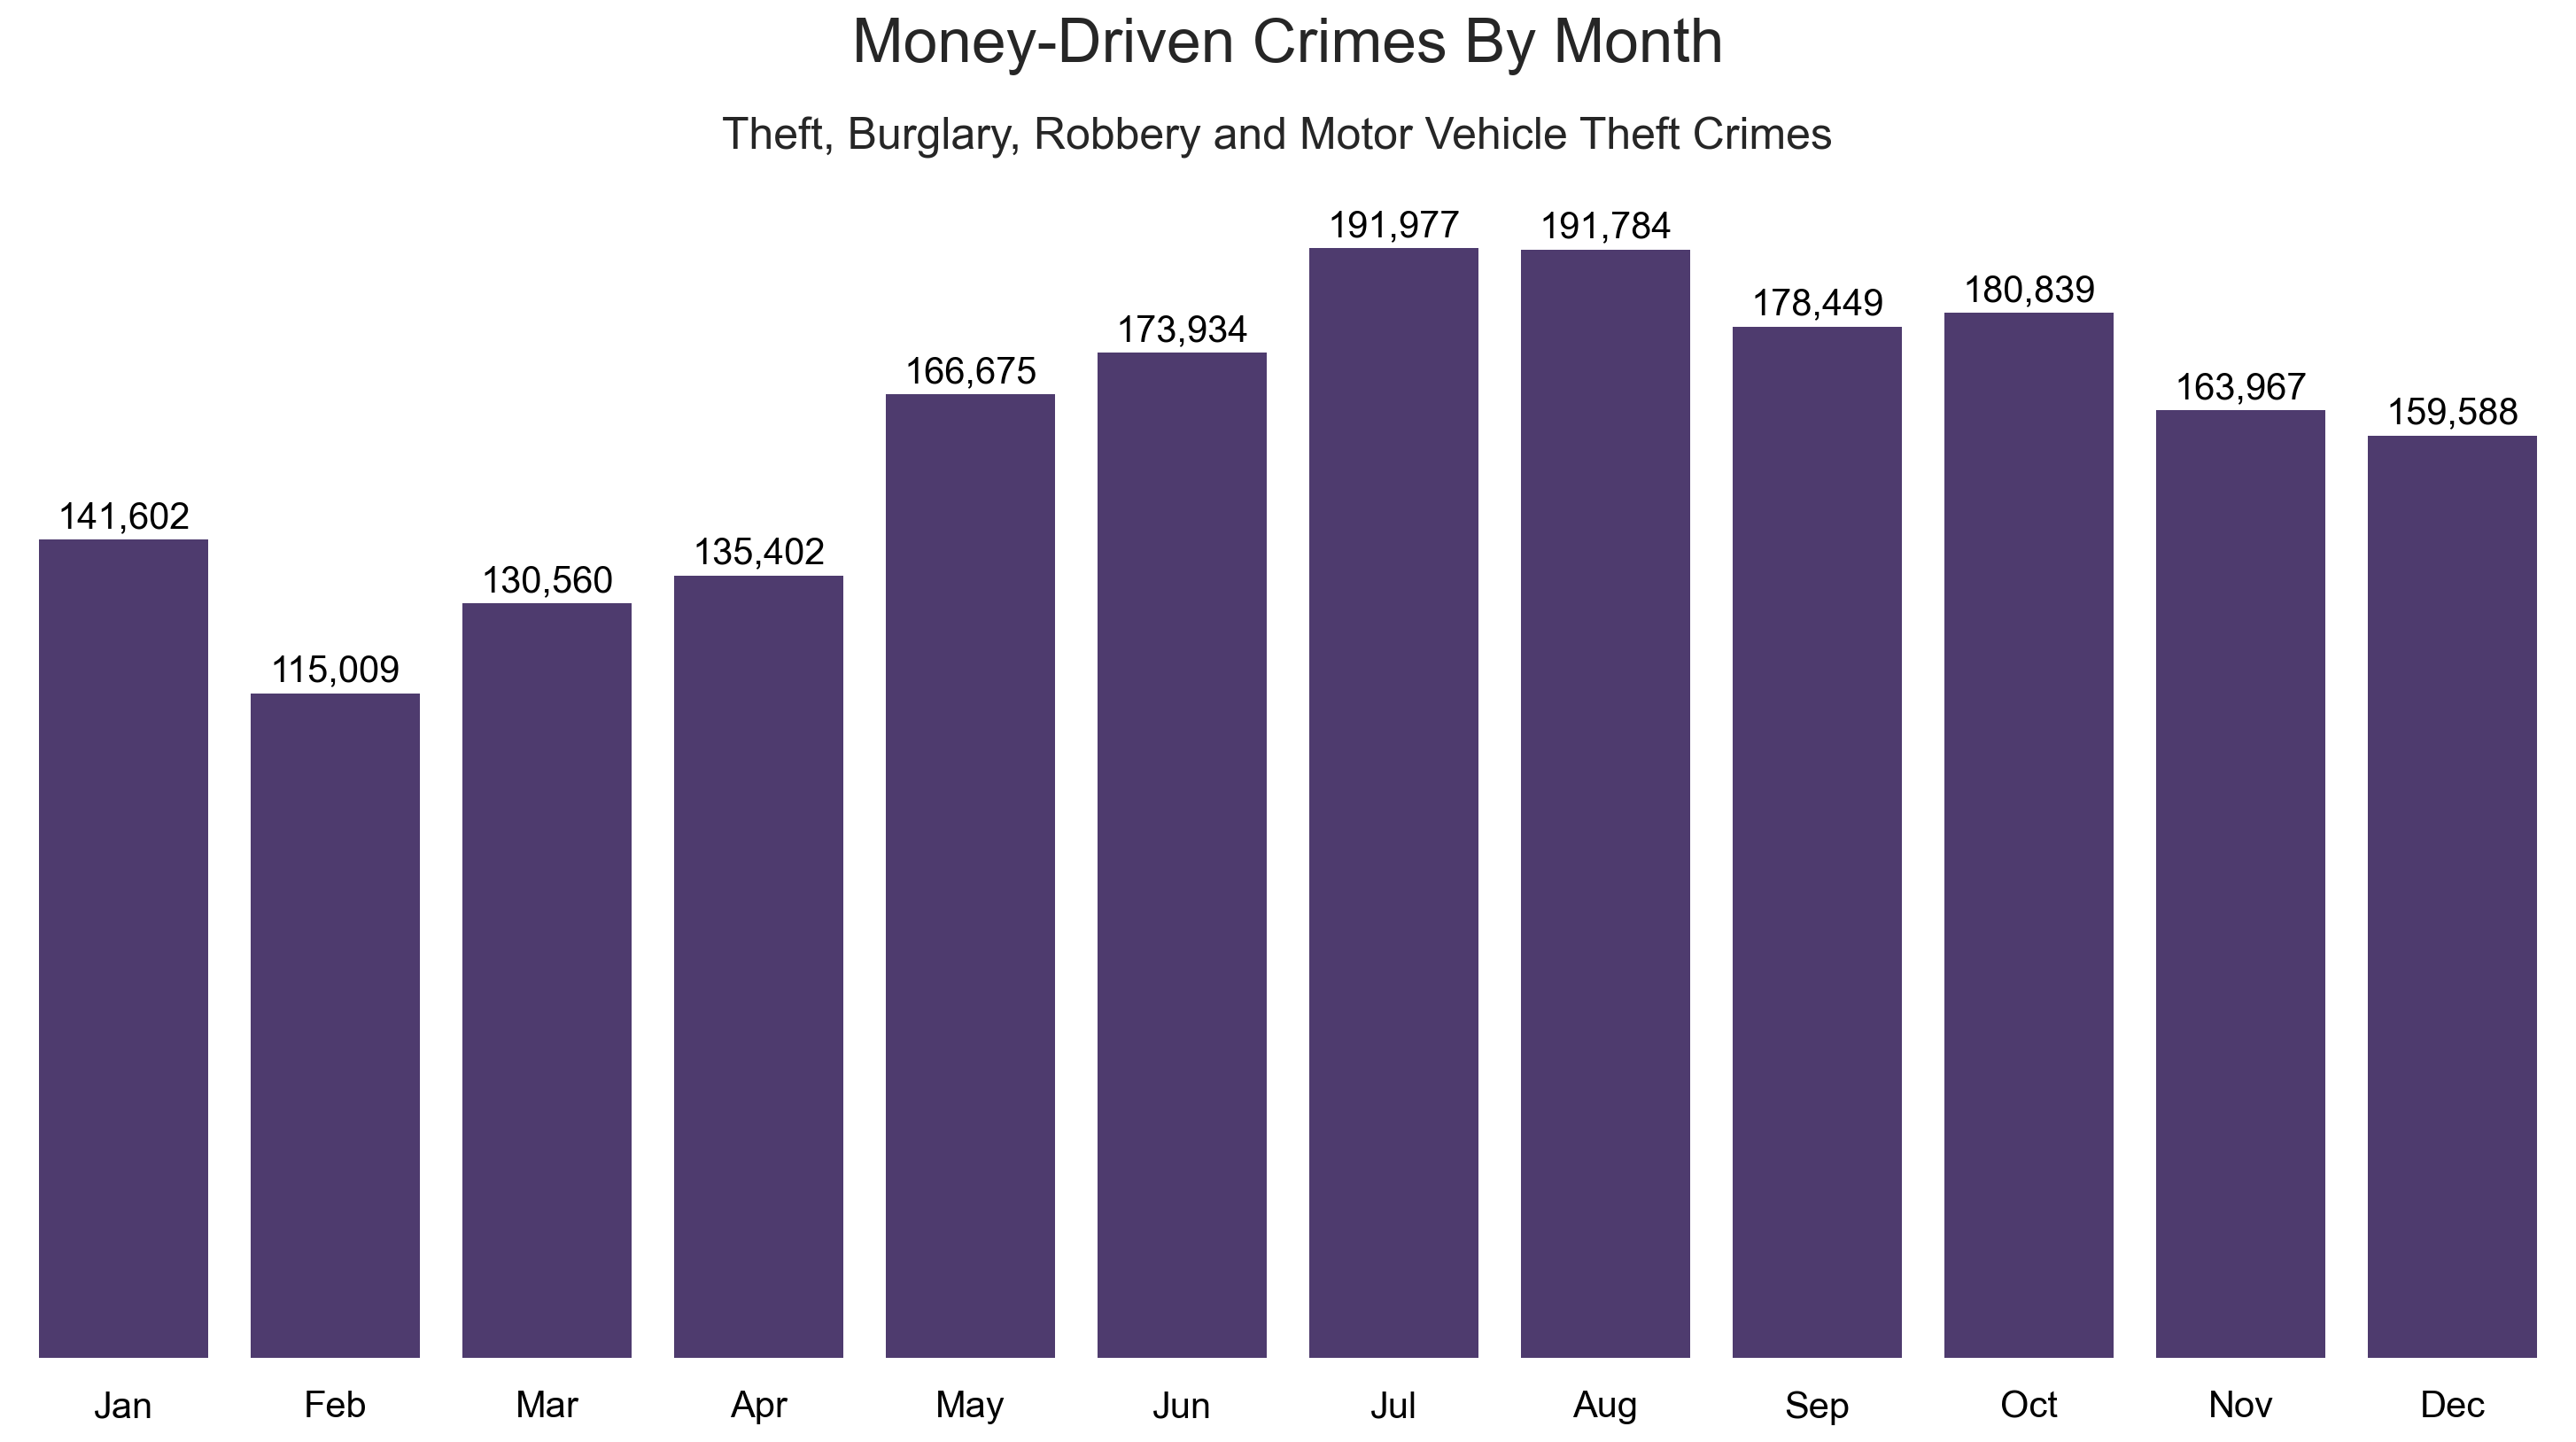

In [26]:
def set_bar_plot(data, x, color):
    fig, ax = plt.subplots(figsize=figsize) # Create figure and axes with default figure size
    
    base_color = sb.color_palette()[0]
    sb_barplot = sb.countplot(x=x, data=data, color=color, edgecolor=None, linewidth=0) # Create bar plot
    sb.despine(left=True, bottom=True) # Remove plot borders
    
    for p in sb_barplot.patches: # Add annotation for each patch
        sb_barplot.annotate(text       = format(int(p.get_height()), ',d'),
                            xy         = (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha         = 'center', va = 'center',
                            xytext     = (0, 9),
                            textcoords = 'offset points',
                            color='black',
                            size = 15)
    
    plt.xticks(fontsize=15, color = 'black') # Increase x ticks labels font size
    plt.yticks([]), plt.xlabel(''), plt.ylabel('') # Remove ticks and label
        
    plt.title(f'Money-Driven Crimes By {x.title()}', y = 1.1, fontsize = 25); # Add descriptive title
    
    plt.tight_layout() # Improve appearance
    legend = plt.legend(labels=['Theft, Burglary, Robbery and Motor Vehicle Theft Crimes'], 
                        bbox_to_anchor=(0.73, 1.1), fontsize = 18, handlelength=0, handletextpad=0)
    
    plt.savefig(f'src/money_crimes_{x}.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file
    
set_bar_plot(data=money_crimes, x='month', color='#4c3277')

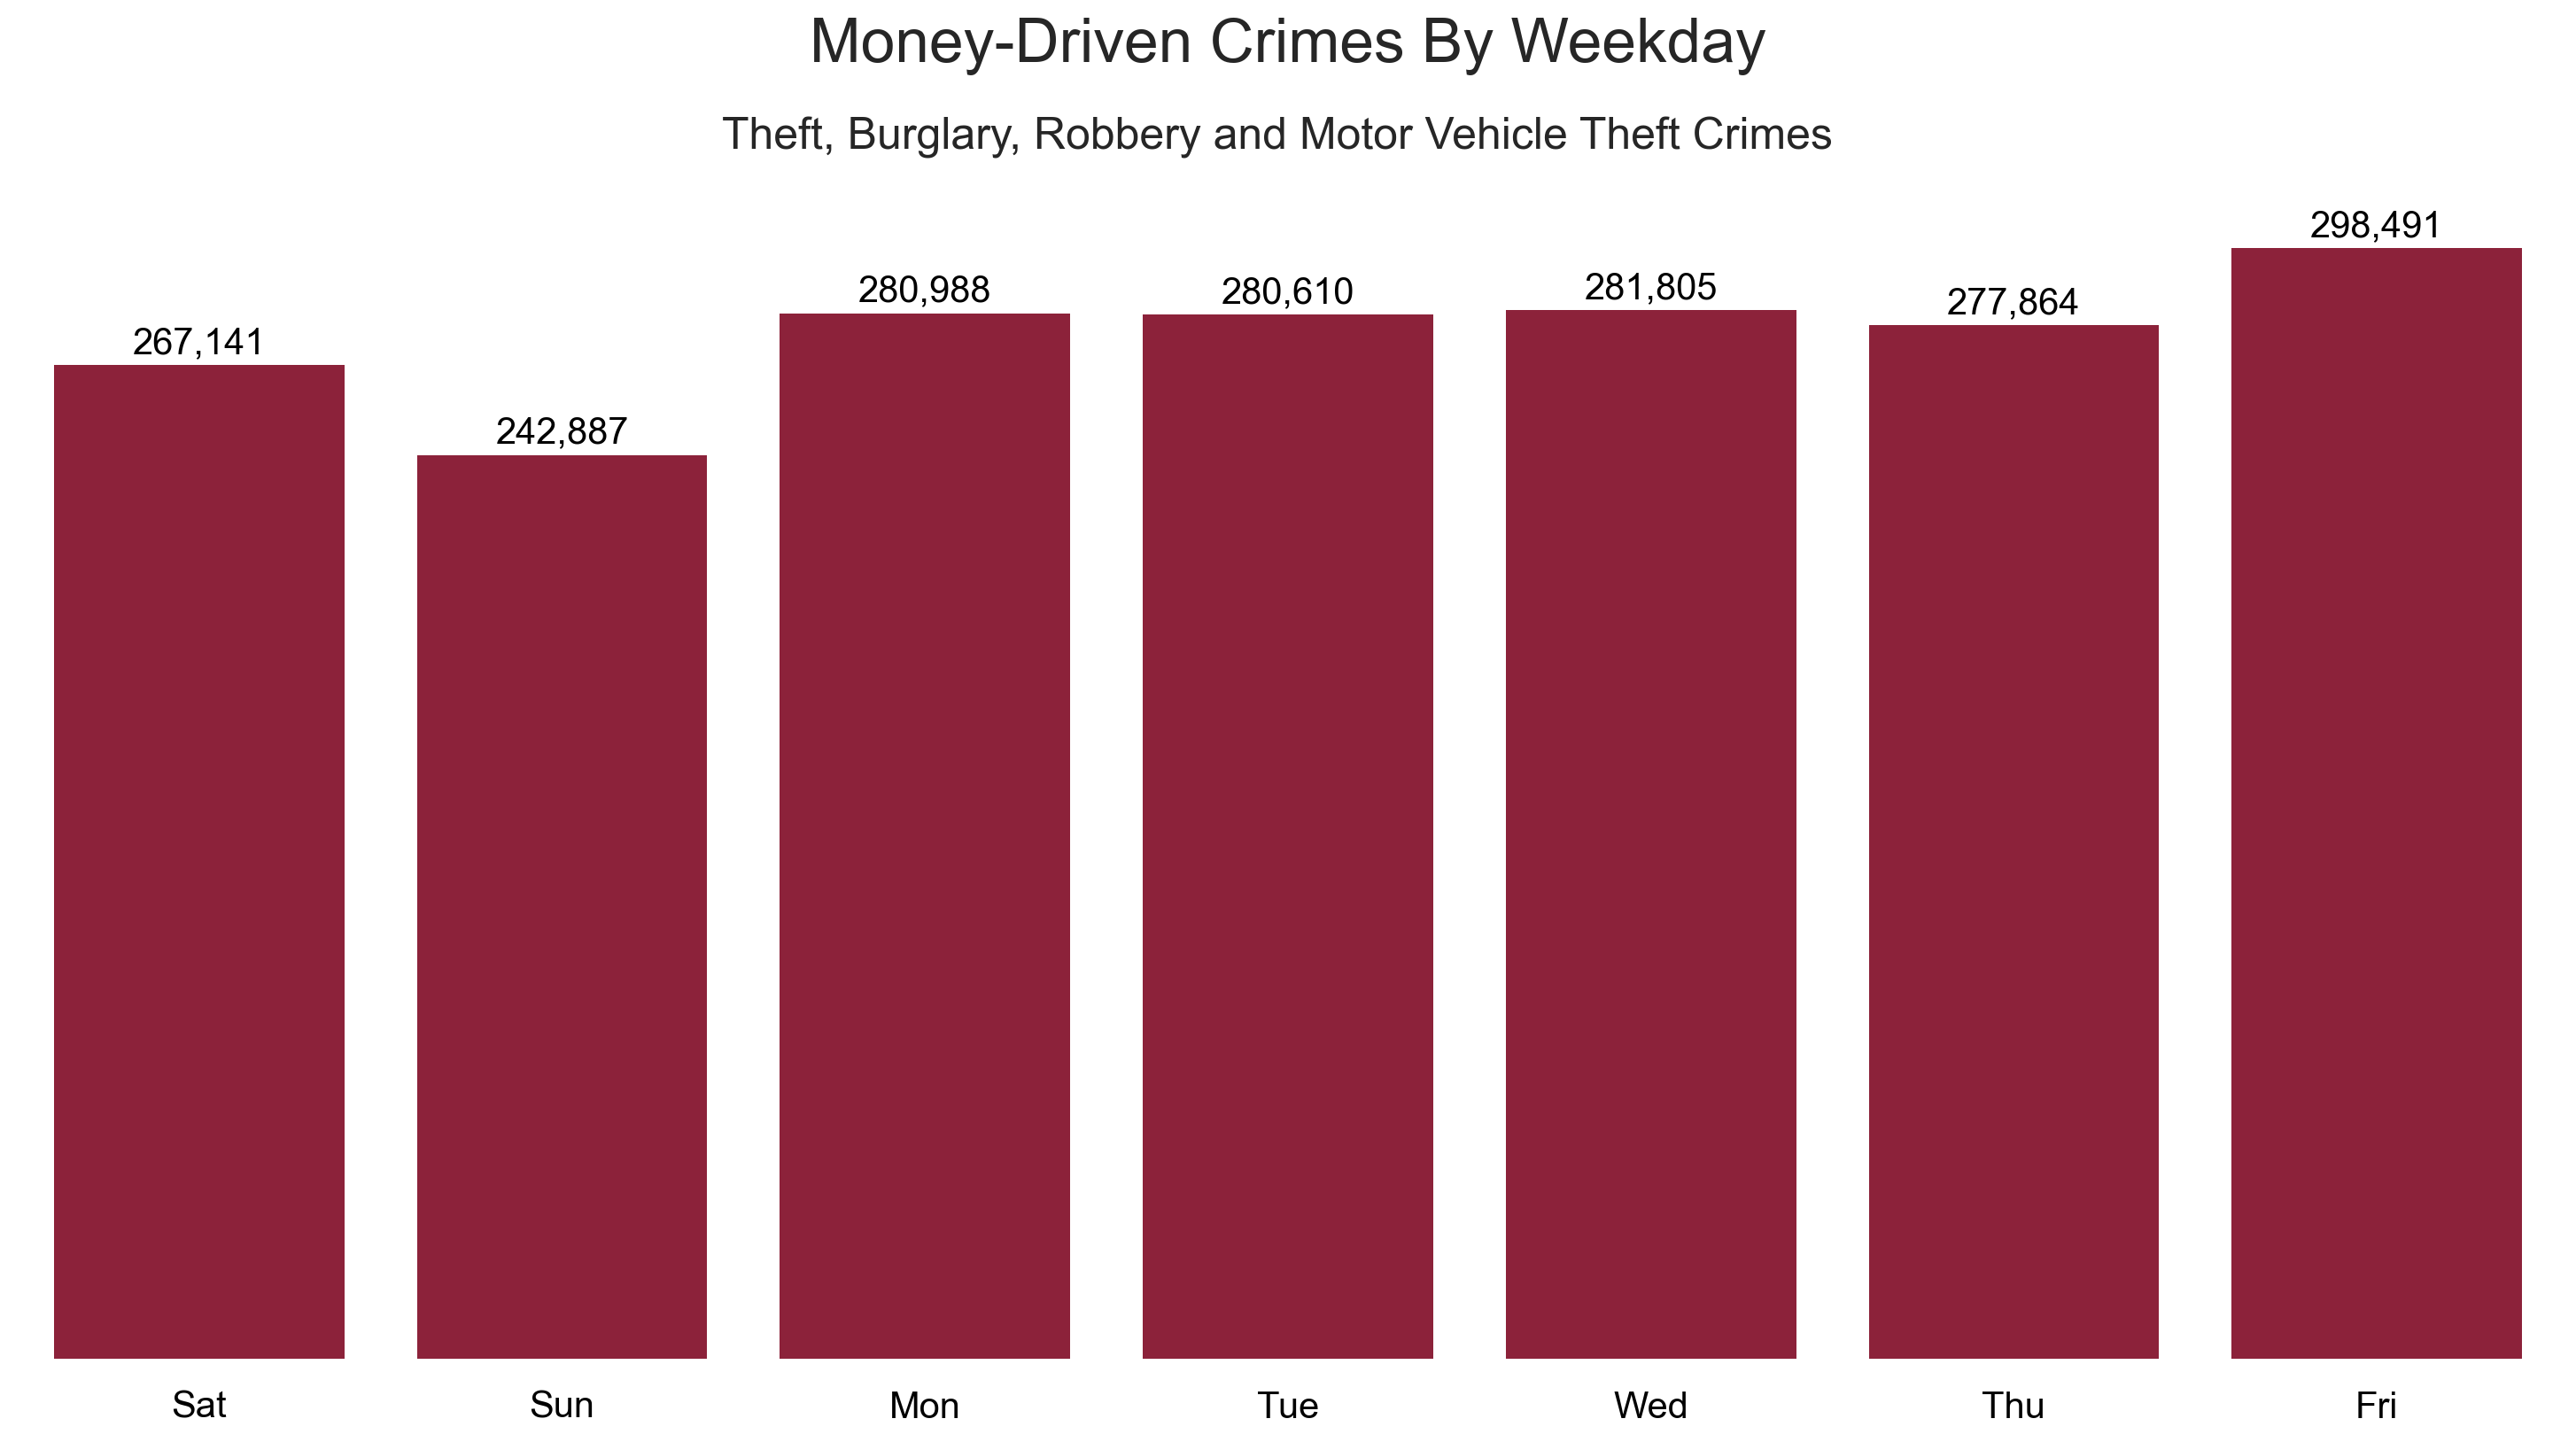

In [27]:
set_bar_plot(data=money_crimes, x='weekday', color='#9e1030ff')

<a id="id_6_6"></a>
## [**What're the Most Dangerous Locations in Chicago?**](#id_6_6)

[Back to Questions](#id_6)

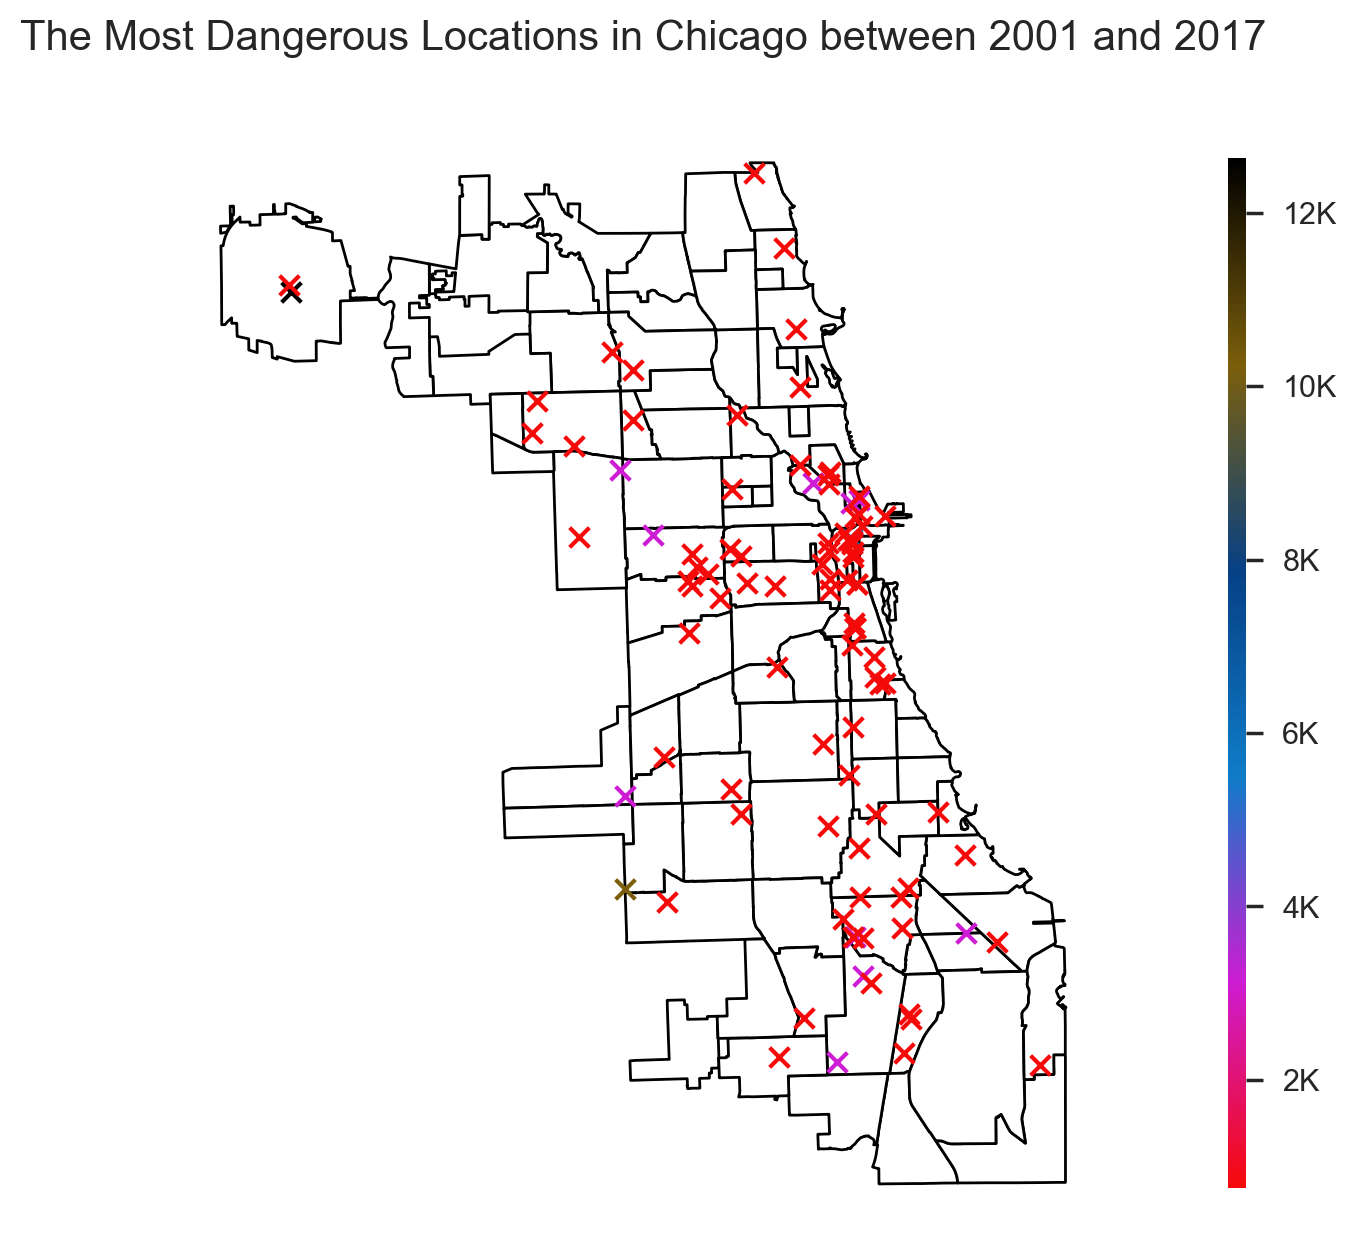

In [28]:
num_of_degrees = len(gdf.severity.unique())

color_pal = ['#F60909', '#CD1CD3', '#0F7CC8', '#064085', '#7C5F0B', '#000000'] # Custom colors
mycmap = LinearSegmentedColormap.from_list('mycmap', color_pal) # Custom Colormap

color_pal.reverse() # Reverse Colormap

ax = chicago.plot(color='white', edgecolor='black', figsize=[6, 10])

# Assign color for each degree of severity
for n, c in zip(range(1,num_of_degrees+2), color_pal):
    if n in gdf['severity'].unique():
        gdf_current = gdf.query(f'severity == {n}')
        gdf_current.plot(ax=ax, color=c, marker='x', markersize=50)

plt.xticks(ticks=[]), plt.yticks(ticks=[]) # Remove x and y ticks
plt.title('The Most Dangerous Locations in Chicago between 2001 and 2017', y = 1.04, fontsize=15) # Set title

sb.despine(ax=ax, left=True, bottom=True) # Remove plot borders

# Create custome colorbar
vmin, vmax = -0.5, 4.25
fig = ax.get_figure()
cax = fig.add_axes([1.0, 0.245, 0.015, 0.515])
sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = [0, 1, 2, 3, 4]
cbar = fig.colorbar(sm, cax=cax)

cbar.set_ticks(np.arange(0, 5, 0.8))
cbar.set_ticklabels(['2K', '4K', '6K', '8K', '10K', '12K'])

cbar.outline.set_visible(False) # Remove colorbar border color

plt.savefig(f'src/top_danger_map.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file